Project: Time-Series Benchmark for Market Risk Model (VaR) Concept: While not strictly Compliance, Value-at-Risk (VaR) is a fundamental model in financial risk management. As a Model Risk Analyst, you might be asked to validate or benchmark such models. This project involves building a simple VaR model and comparing it against more advanced methods. Kaggle Dataset: "S&P 500 Stock Data" or "JPMorgan Chase & Co. (JPM) Stock Price History".

Implementation Link to Your Role:

Develop Benchmarking Tools: Implement a simple Historical Simulation VaR and a parametric (Variance-Covariance) VaR. Then, benchmark it against a more complex model like a VaR based on a GARCH model (which captures volatility clustering).

Monitor Performance: Perform a "backtest" by checking how often actual losses exceed the VaR estimate. This is a direct application of Ongoing Performance Monitoring for a model.

Technical Skills: Time-series analysis, statistical modeling (GARCH), financial risk concepts (VaR), backtesting, Python (arch library for GARCH).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Time series analysis libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Risk modeling libraries
from arch import arch_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
import joblib
print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
pd.set_option('display.max_column',None)

In [ ]:

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TimeSeries_MarketRiskModel_VAR/JPM_1940-01-01_2025-03-04.csv')
df.head()

date  open      high       low     close  adj_close  \
0  1980-03-17 00:00:00-05:00   0.0  5.129630  5.018519  5.037037   1.059499   
1  1980-03-18 00:00:00-05:00   0.0  5.111111  5.037037  5.074074   1.067288   
2  1980-03-19 00:00:00-05:00   0.0  5.166667  5.111111  5.148148   1.082870   
3  1980-03-20 00:00:00-05:00   0.0  5.148148  5.092593  5.111111   1.075079   
4  1980-03-21 00:00:00-05:00   0.0  5.222222  5.111111  5.222222   1.098450   

   volume  
0   62775  
1   64125  
2   40500  
3   18900  
4   97200

In [ ]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       11333 non-null  object 
 1   open       11333 non-null  float64
 2   high       11333 non-null  float64
 3   low        11333 non-null  float64
 4   close      11333 non-null  float64
 5   adj_close  11333 non-null  float64
 6   volume     11333 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 619.9+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'], utc=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       11333 non-null  datetime64[ns, UTC]
 1   open       11333 non-null  float64            
 2   high       11333 non-null  float64            
 3   low        11333 non-null  float64            
 4   close      11333 non-null  float64            
 5   adj_close  11333 non-null  float64            
 6   volume     11333 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 619.9 KB


In [ ]:
df.head()

date  open      high       low     close  adj_close  \
0 1980-03-17 05:00:00+00:00   0.0  5.129630  5.018519  5.037037   1.059499   
1 1980-03-18 05:00:00+00:00   0.0  5.111111  5.037037  5.074074   1.067288   
2 1980-03-19 05:00:00+00:00   0.0  5.166667  5.111111  5.148148   1.082870   
3 1980-03-20 05:00:00+00:00   0.0  5.148148  5.092593  5.111111   1.075079   
4 1980-03-21 05:00:00+00:00   0.0  5.222222  5.111111  5.222222   1.098450   

   volume  
0   62775  
1   64125  
2   40500  
3   18900  
4   97200

In [ ]:
df.describe()

open          high           low         close     adj_close  \
count  11333.000000  11333.000000  11333.000000  11333.000000  11333.000000   
mean      47.650690     48.864861     47.802095     48.341867     35.903285   
std       47.609704     47.386495     46.576374     46.989746     46.717100   
min        0.000000      3.625000      3.208333      3.375000      1.055603   
25%       12.791667     12.916667     12.666667     12.791667      3.960814   
50%       37.187500     37.666668     36.750000     37.200001     21.451645   
75%       56.279999     56.770000     55.599998     56.189999     40.660828   
max      278.679993    280.250000    277.220001    279.950012    279.950012   

             volume  
count  1.133300e+04  
mean   1.191871e+07  
std    1.630544e+07  
min    1.147500e+04  
25%    1.535400e+06  
50%    7.858000e+06  
75%    1.437610e+07  
max    2.172942e+08

In [ ]:
df['date'] = df['date'].dt.date

In [ ]:
df.describe()

open          high           low         close     adj_close  \
count  11333.000000  11333.000000  11333.000000  11333.000000  11333.000000   
mean      47.650690     48.864861     47.802095     48.341867     35.903285   
std       47.609704     47.386495     46.576374     46.989746     46.717100   
min        0.000000      3.625000      3.208333      3.375000      1.055603   
25%       12.791667     12.916667     12.666667     12.791667      3.960814   
50%       37.187500     37.666668     36.750000     37.200001     21.451645   
75%       56.279999     56.770000     55.599998     56.189999     40.660828   
max      278.679993    280.250000    277.220001    279.950012    279.950012   

             volume  
count  1.133300e+04  
mean   1.191871e+07  
std    1.630544e+07  
min    1.147500e+04  
25%    1.535400e+06  
50%    7.858000e+06  
75%    1.437610e+07  
max    2.172942e+08

In [ ]:
df.set_index('date', inplace=True)

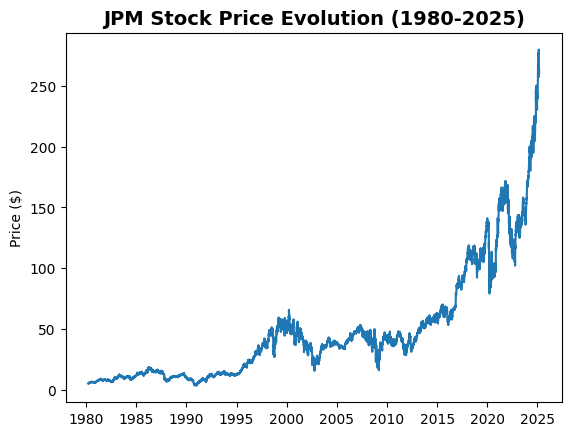

In [ ]:
plt.plot(df['close'])
plt.title('JPM Stock Price Evolution (1980-2025)', fontsize=14, fontweight='bold')
plt.ylabel('Price ($)');


In [ ]:
# Calculate daily returns
df['returns'] = df['close'].pct_change() * 100
df['log_returns'] = np.log(df['close'] / df['close'].shift(1)) * 100
df.head()


open      high       low     close  adj_close  volume   returns  \
date                                                                          
1980-03-17   0.0  5.129630  5.018519  5.037037   1.059499   62775       NaN   
1980-03-18   0.0  5.111111  5.037037  5.074074   1.067288   64125  0.735291   
1980-03-19   0.0  5.166667  5.111111  5.148148   1.082870   40500  1.459858   
1980-03-20   0.0  5.148148  5.092593  5.111111   1.075079   18900 -0.719422   
1980-03-21   0.0  5.222222  5.111111  5.222222   1.098450   97200  2.173905   

            log_returns  
date                     
1980-03-17          NaN  
1980-03-18     0.732601  
1980-03-19     1.449305  
1980-03-20    -0.722022  
1980-03-21     2.150612

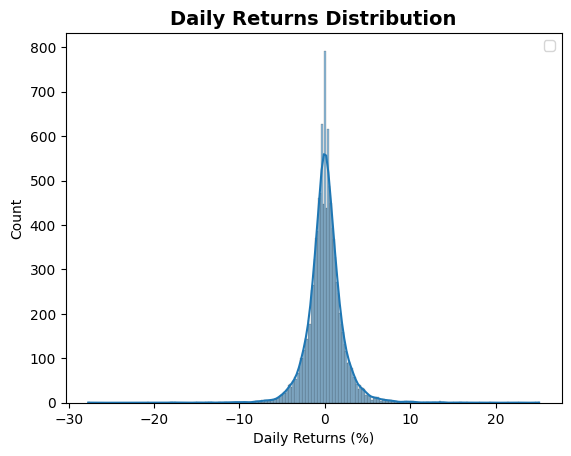

In [ ]:
sns.histplot(df['returns'], kde=True)
plt.title('Daily Returns Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Daily Returns (%)')
plt.legend();

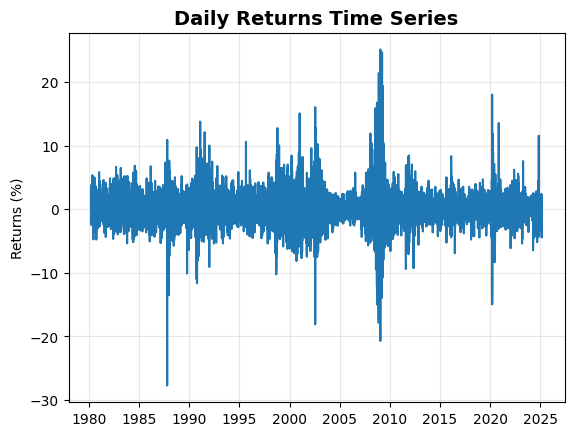

In [ ]:
plt.plot(df.index, df['returns'])
plt.title('Daily Returns Time Series', fontsize=14, fontweight='bold')
plt.ylabel('Returns (%)')
plt.grid(True, alpha=0.3)

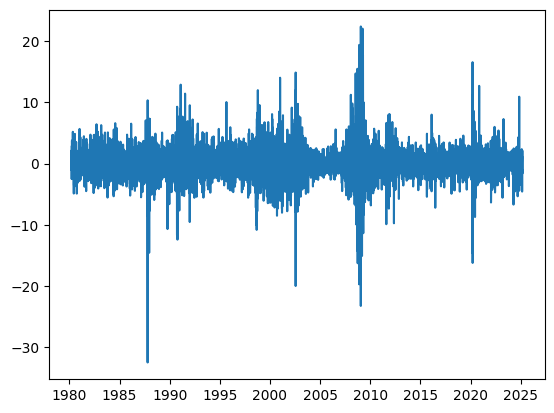

In [ ]:
plt.plot(df['log_returns'])

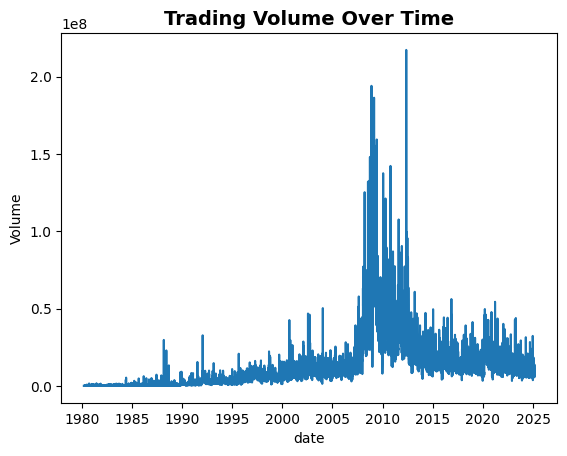

In [ ]:
sns.lineplot(df['volume'])
plt.title('Trading Volume Over Time', fontsize=14, fontweight='bold')
plt.ylabel('Volume');

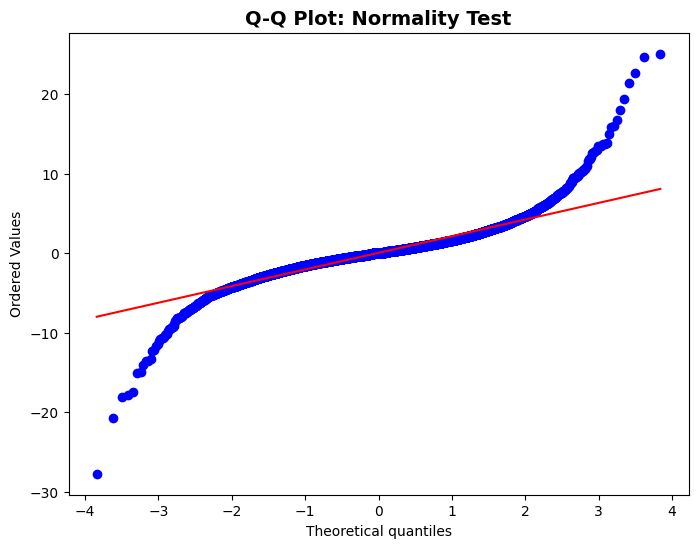

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(df['returns'].dropna(), dist="norm", plot=ax)
plt.title('Q-Q Plot: Normality Test', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
df.describe()

open          high           low         close     adj_close  \
count  11333.000000  11333.000000  11333.000000  11333.000000  11333.000000   
mean      47.650690     48.864861     47.802095     48.341867     35.903285   
std       47.609704     47.386495     46.576374     46.989746     46.717100   
min        0.000000      3.625000      3.208333      3.375000      1.055603   
25%       12.791667     12.916667     12.666667     12.791667      3.960814   
50%       37.187500     37.666668     36.750000     37.200001     21.451645   
75%       56.279999     56.770000     55.599998     56.189999     40.660828   
max      278.679993    280.250000    277.220001    279.950012    279.950012   

             volume       returns   log_returns  
count  1.133300e+04  11332.000000  11332.000000  
mean   1.191871e+07      0.059424      0.034824  
std    1.630544e+07      2.221315      2.217565  
min    1.147500e+04    -27.719301    -32.461305  
25%    1.535400e+06     -0.966346     -0.971046  
50%    7.858000e+06      0.000000      0.000000  
75%    1.437610e+07      1.027623      1.022378  
max    2.172942e+08     25.096733     22.391711

<Axes: ylabel='returns'>

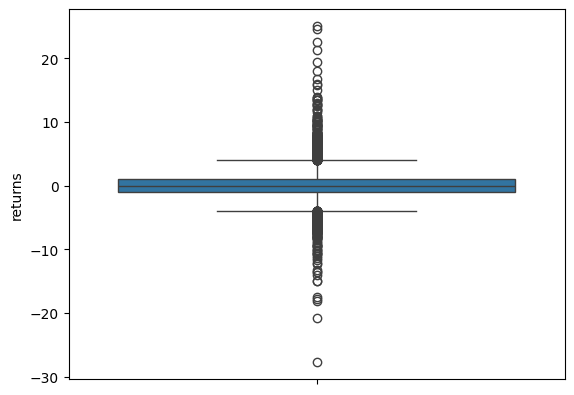

In [ ]:
sns.boxplot(df['returns'])

In [ ]:
# Remove first row with NaN
df = df.dropna()

In [ ]:
# Statistical tests for returns
print("=== STATISTICAL TESTS FOR RETURNS ===")

# Normality tests
jb_test = stats.jarque_bera(df['returns'].dropna())
adf_test = adfuller(df['returns'].dropna())

print(f"Mean Return: {df['returns'].mean():.4f}%")
print(f"Standard Deviation: {df['returns'].std():.4f}%")
print(f"Skewness: {stats.skew(df['returns'].dropna()):.4f}")
print(f"Kurtosis: {stats.kurtosis(df['returns'].dropna()):.4f}")
print(f"Jarque-Bera Test: Stat={jb_test[0]:.2f}, p-value={jb_test[1]:.4f}")
print(f"ADF Test: Stat={adf_test[0]:.4f}, p-value={adf_test[1]:.4f}")

# VaR at different confidence levels
confidence_levels = [0.90, 0.95, 0.99]
print("\n=== HISTORICAL VaR ===")
for cl in confidence_levels:
    var = np.percentile(df['returns'], (1-cl)*100)
    print(f"VaR at {cl*100}% confidence: {var:.4f}%")

=== STATISTICAL TESTS FOR RETURNS ===
Mean Return: 0.0594%
Standard Deviation: 2.2213%
Skewness: 0.4451
Kurtosis: 14.2370
Jarque-Bera Test: Stat=96078.30, p-value=0.0000
ADF Test: Stat=-18.5381, p-value=0.0000

=== HISTORICAL VaR ===
VaR at 90.0% confidence: -2.1948%
VaR at 95.0% confidence: -3.1250%
VaR at 99.0% confidence: -5.4730%


In [ ]:
jb_test = stats.jarque_bera(df['returns'].dropna())
p_value = jb_test[1]

if p_value < 0.05:
  print("The data is not normally distributed.")
else:
  print("data is normally distributed")

The data is not normally distributed.


In [ ]:
if adf_test[1] < 0.05:
  print("data is stationary")
else:
  print("data is non-stationary")

data is stationary


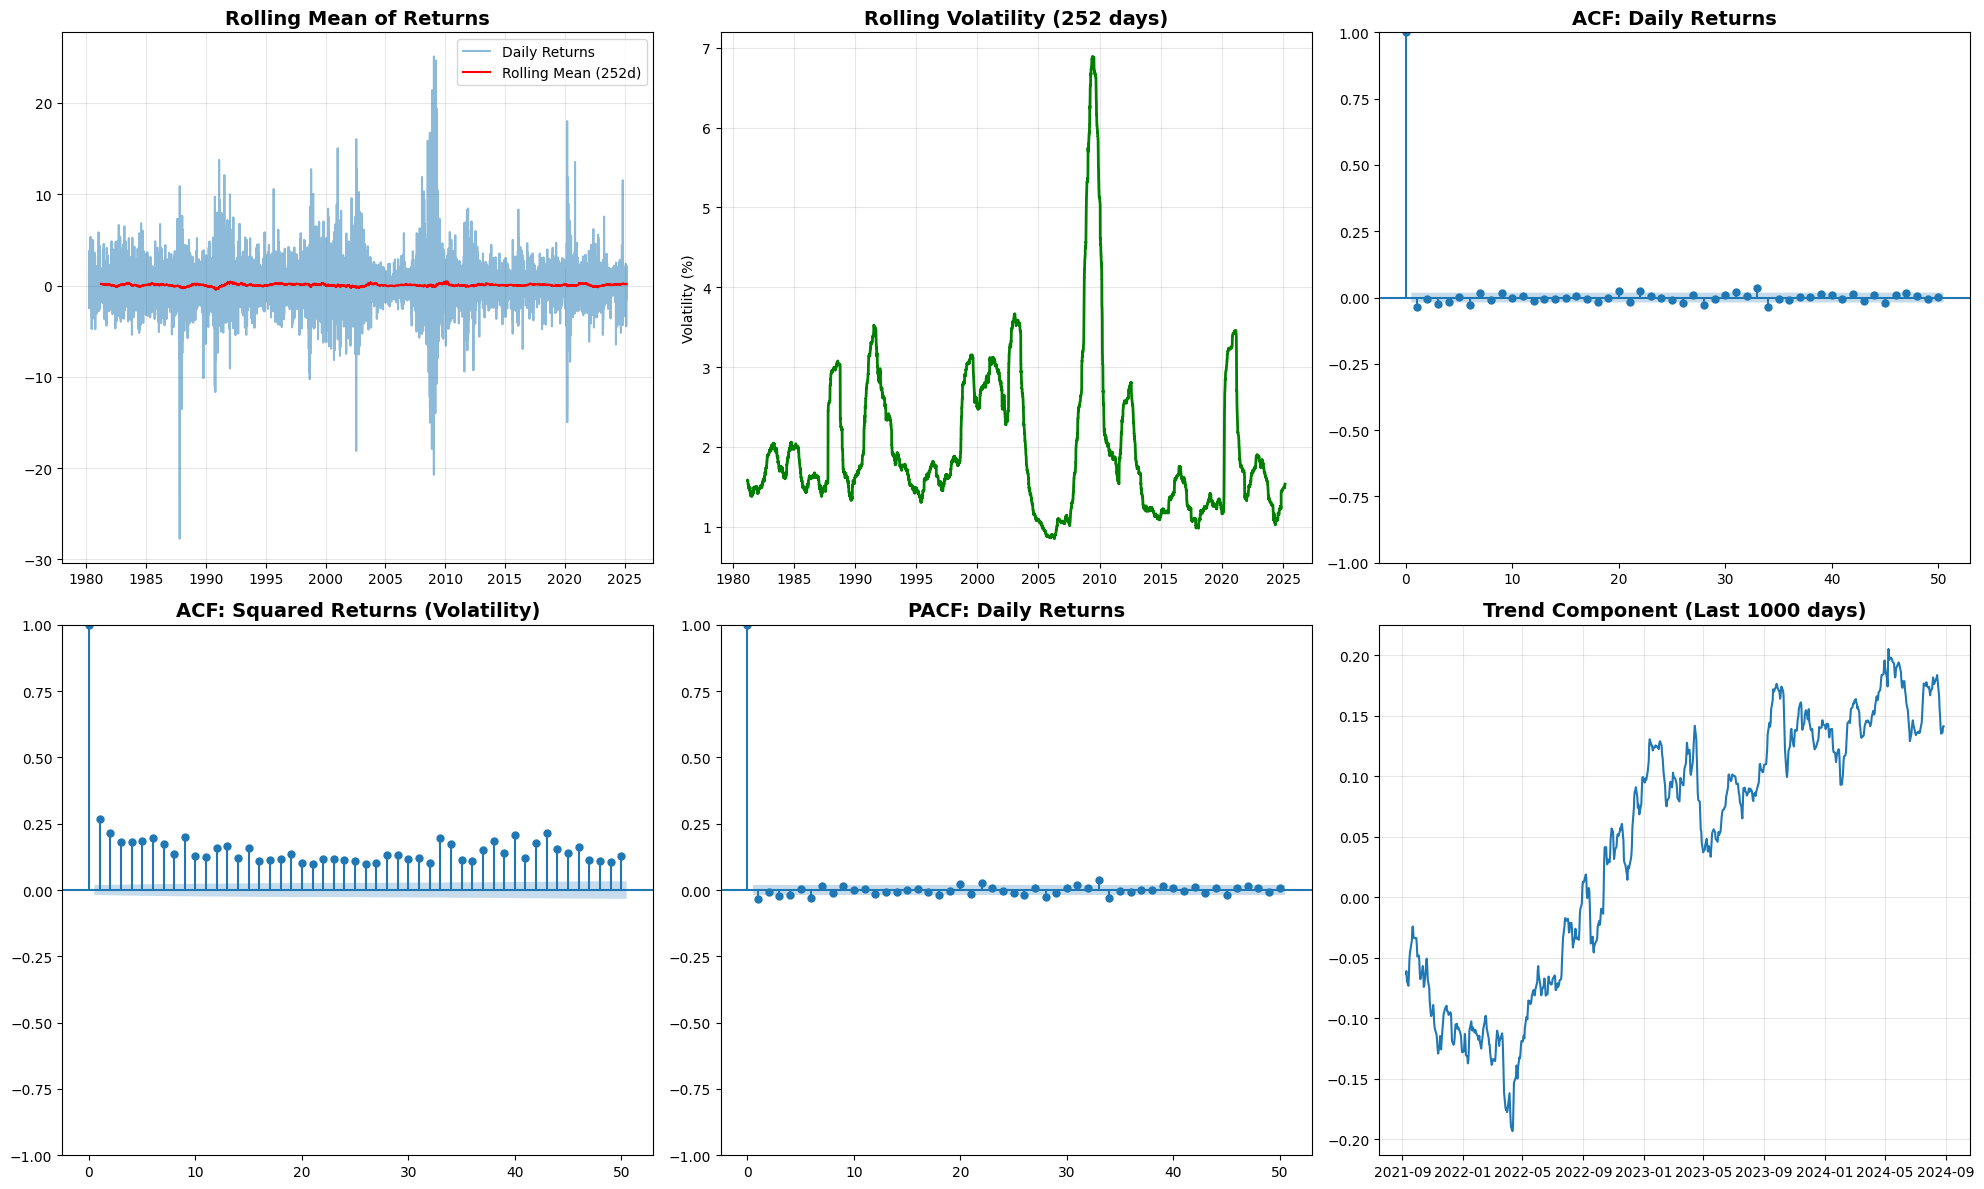

In [ ]:
# Correlation analysis and ACF/PACF plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Rolling statistics
rolling_window = 252  # 1 year
df['rolling_mean'] = df['returns'].rolling(window=rolling_window).mean()
df['rolling_std'] = df['returns'].rolling(window=rolling_window).std()

axes[0,0].plot(df.index, df['returns'], alpha=0.5, label='Daily Returns')
axes[0,0].plot(df.index, df['rolling_mean'], 'r-', label=f'Rolling Mean ({rolling_window}d)')
axes[0,0].set_title('Rolling Mean of Returns', fontsize=14, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Rolling volatility
axes[0,1].plot(df.index, df['rolling_std'], 'g-', linewidth=2)
axes[0,1].set_title(f'Rolling Volatility ({rolling_window} days)', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Volatility (%)')
axes[0,1].grid(True, alpha=0.3)

# 3. ACF of returns
plot_acf(df['returns'].dropna(), lags=50, ax=axes[0,2], alpha=0.05)
axes[0,2].set_title('ACF: Daily Returns', fontsize=14, fontweight='bold')

# 4. ACF of squared returns (volatility clustering)
plot_acf(df['returns'].dropna()**2, lags=50, ax=axes[1,0], alpha=0.05)
axes[1,0].set_title('ACF: Squared Returns (Volatility)', fontsize=14, fontweight='bold')

# 5. PACF of returns
plot_pacf(df['returns'].dropna(), lags=50, ax=axes[1,1], alpha=0.05)
axes[1,1].set_title('PACF: Daily Returns', fontsize=14, fontweight='bold')

# 6. Seasonal decomposition (using log returns for stability)
try:
    decomposition = seasonal_decompose(df['log_returns'].iloc[-1000:],
                                     period=252, model='additive')
    axes[1,2].plot(decomposition.trend)
    axes[1,2].set_title('Trend Component (Last 1000 days)', fontsize=14, fontweight='bold')
    axes[1,2].grid(True, alpha=0.3)
except:
    axes[1,2].text(0.5, 0.5, 'Seasonal decomposition\nnot available',
                  ha='center', va='center', transform=axes[1,2].transAxes)

plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
df['price_range'] = (df['high'] - df['low']) / df['close'] * 100
df['price_gap'] = (df['open'] - df['close'].shift(1)) / df['close'].shift(1) * 100
df.head()

open      high       low     close  adj_close  volume   returns  \
date                                                                          
1980-03-18   0.0  5.111111  5.037037  5.074074   1.067288   64125  0.735291   
1980-03-19   0.0  5.166667  5.111111  5.148148   1.082870   40500  1.459858   
1980-03-20   0.0  5.148148  5.092593  5.111111   1.075079   18900 -0.719422   
1980-03-21   0.0  5.222222  5.111111  5.222222   1.098450   97200  2.173905   
1980-03-24   0.0  5.185185  5.092593  5.092593   1.071184   90450 -2.482251   

            log_returns  rolling_mean  rolling_std  price_range  price_gap  
date                                                                        
1980-03-18     0.732601           NaN          NaN     1.459858        NaN  
1980-03-19     1.449305           NaN          NaN     1.079142     -100.0  
1980-03-20    -0.722022           NaN          NaN     1.086943     -100.0  
1980-03-21     2.150612           NaN          NaN     2.127652     -100.0  
1980-03-24    -2.513578           NaN          NaN     1.818165     -100.0

In [ ]:
window_sizes=[5, 10, 20, 50]
# Volatility features
for window in window_sizes:
    df[f'volatility_{window}'] = df['returns'].rolling(window=window).std()
    df[f'realized_vol_{window}'] = (df['returns']**2).rolling(window=window).mean() * np.sqrt(252)
df.head()

open      high       low     close  adj_close  volume   returns  \
date                                                                          
1980-03-18   0.0  5.111111  5.037037  5.074074   1.067288   64125  0.735291   
1980-03-19   0.0  5.166667  5.111111  5.148148   1.082870   40500  1.459858   
1980-03-20   0.0  5.148148  5.092593  5.111111   1.075079   18900 -0.719422   
1980-03-21   0.0  5.222222  5.111111  5.222222   1.098450   97200  2.173905   
1980-03-24   0.0  5.185185  5.092593  5.092593   1.071184   90450 -2.482251   

            log_returns  rolling_mean  rolling_std  price_range  price_gap  \
date                                                                         
1980-03-18     0.732601           NaN          NaN     1.459858        NaN   
1980-03-19     1.449305           NaN          NaN     1.079142     -100.0   
1980-03-20    -0.722022           NaN          NaN     1.086943     -100.0   
1980-03-21     2.150612           NaN          NaN     2.127652     -100.0   
1980-03-24    -2.513578           NaN          NaN     1.818165     -100.0   

            volatility_5  realized_vol_5  volatility_10  realized_vol_10  \
date                                                                       
1980-03-18           NaN             NaN            NaN              NaN   
1980-03-19           NaN             NaN            NaN              NaN   
1980-03-20           NaN             NaN            NaN              NaN   
1980-03-21           NaN             NaN            NaN              NaN   
1980-03-24      1.857706       44.692576            NaN              NaN   

            volatility_20  realized_vol_20  volatility_50  realized_vol_50  
date                                                                        
1980-03-18            NaN              NaN            NaN              NaN  
1980-03-19            NaN              NaN            NaN              NaN  
1980-03-20            NaN              NaN            NaN              NaN  
1980-03-21            NaN              NaN            NaN              NaN  
1980-03-24            NaN              NaN            NaN              NaN

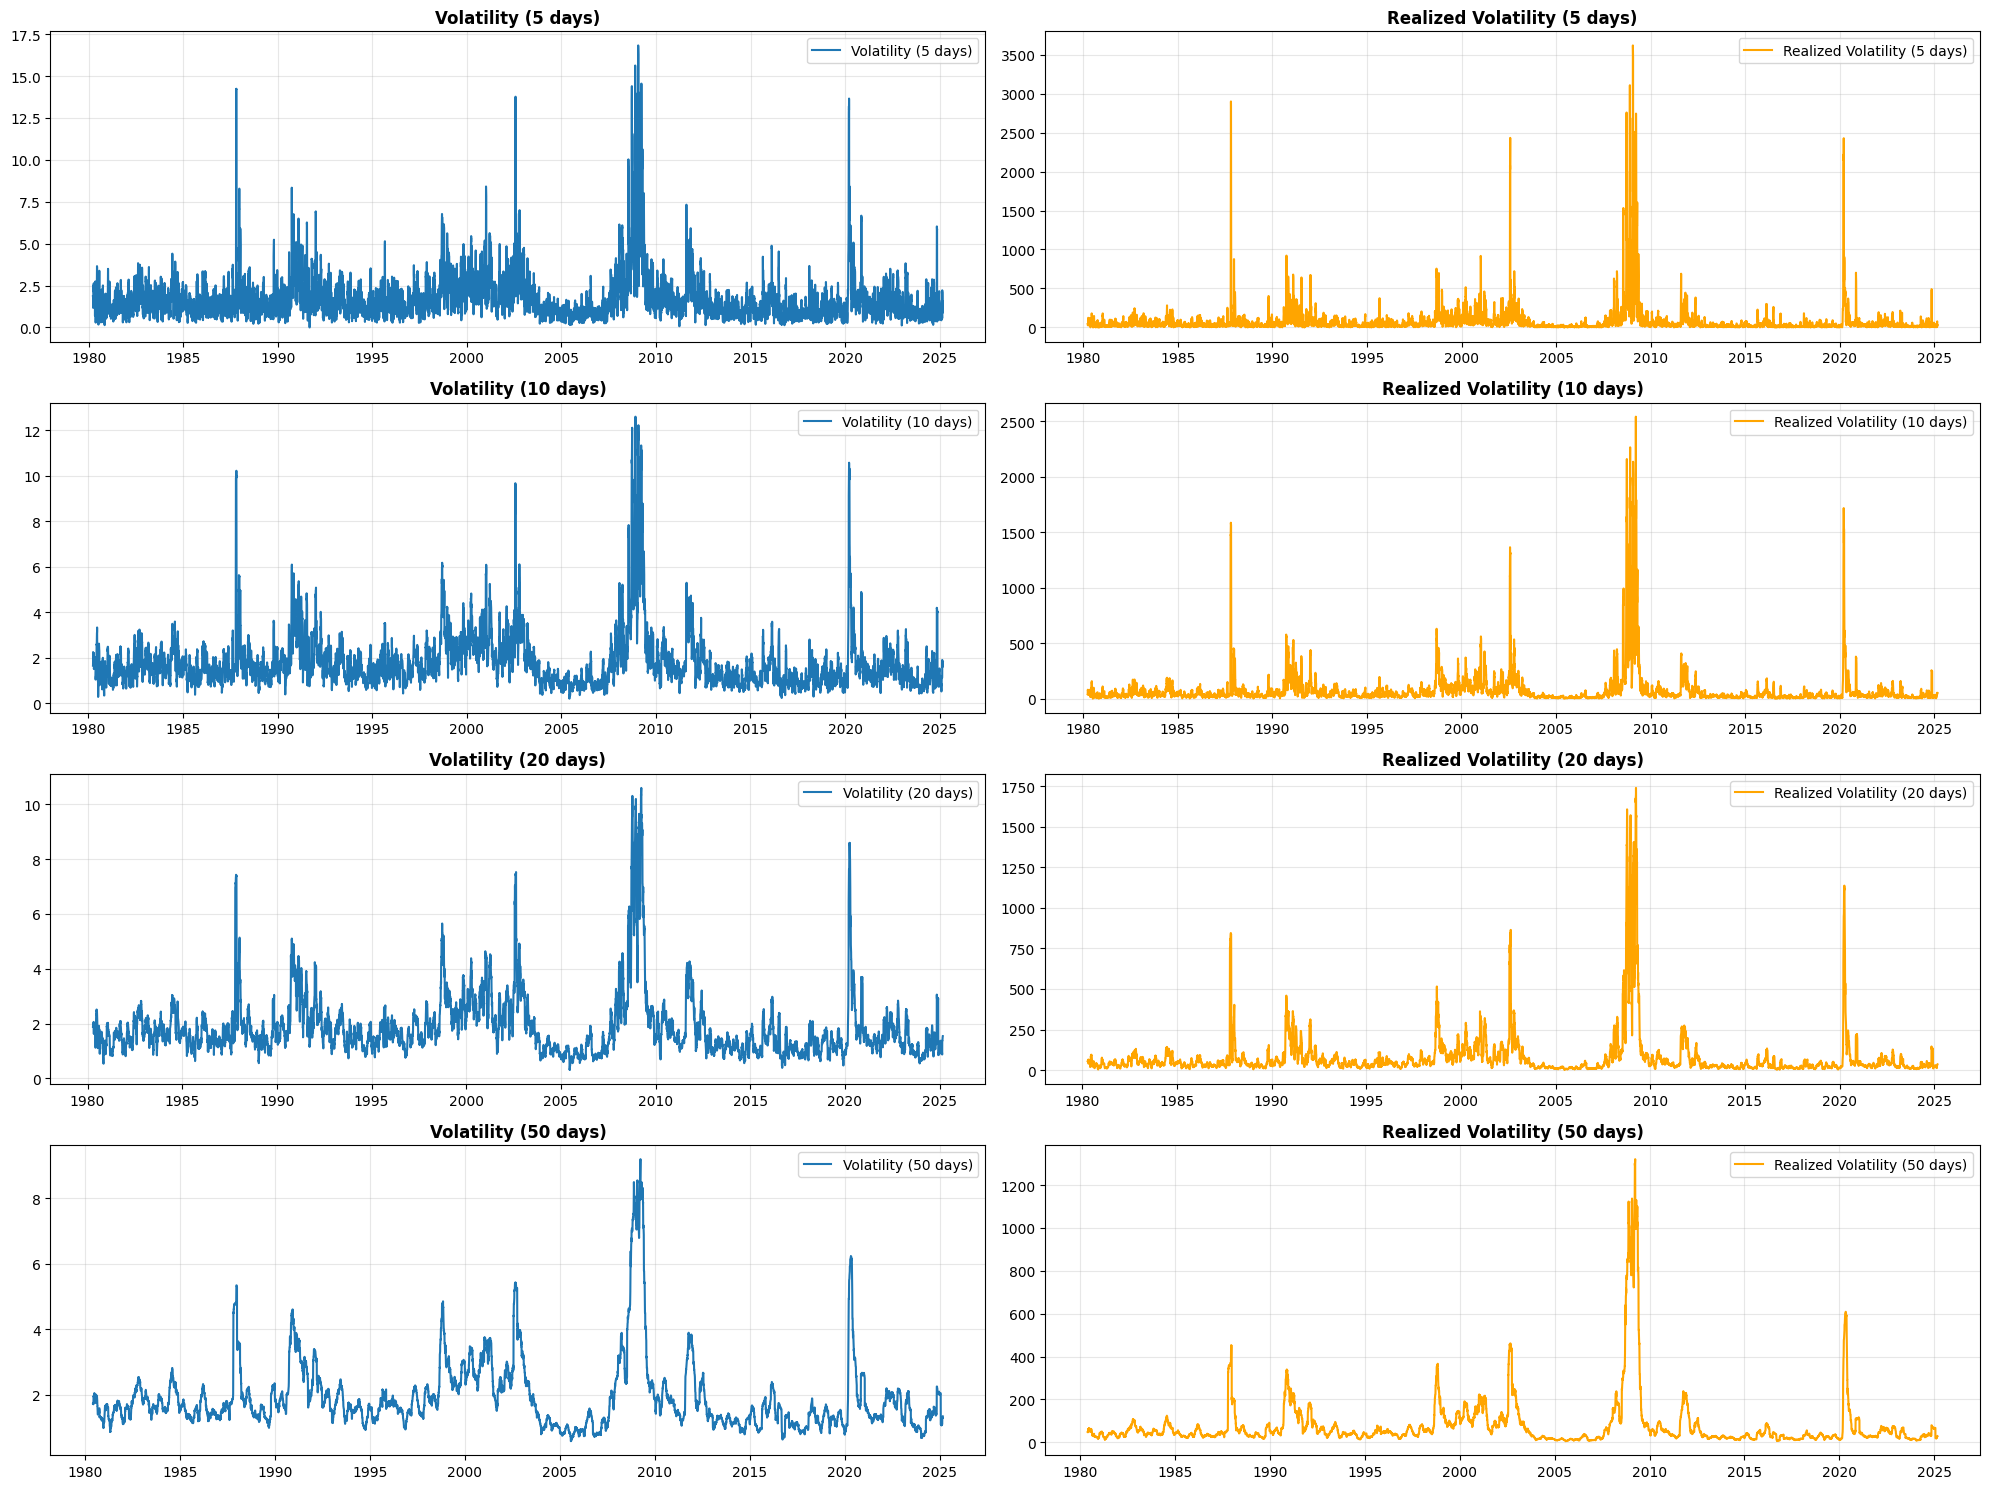

In [ ]:
fig,ax = plt.subplots(4,2, figsize=(20,15)) # Increased figure size for better readability
for i,window in enumerate(window_sizes):
  # Plot volatility on the first column of subplots
  ax[i,0].plot(df[f'volatility_{window}'], label=f'Volatility ({window} days)')
  ax[i,0].set_title(f'Volatility ({window} days)', fontsize=12, fontweight='bold')
  ax[i,0].legend()
  ax[i,0].grid(True, alpha=0.3)

  # Plot realized volatility on the second column of subplots
  ax[i,1].plot(df[f'realized_vol_{window}'], label=f'Realized Volatility ({window} days)', color='orange')
  ax[i,1].set_title(f'Realized Volatility ({window} days)', fontsize=12, fontweight='bold')
  ax[i,1].legend()
  ax[i,1].grid(True, alpha=0.3)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [ ]:
# Moving averages
for window in window_sizes:
    df[f'sma_{window}'] = df['close'].rolling(window=window).mean()
    df[f'ema_{window}'] = df['close'].ewm(span=window).mean()
df.head()

open      high       low     close  adj_close  volume   returns  \
date                                                                          
1980-03-18   0.0  5.111111  5.037037  5.074074   1.067288   64125  0.735291   
1980-03-19   0.0  5.166667  5.111111  5.148148   1.082870   40500  1.459858   
1980-03-20   0.0  5.148148  5.092593  5.111111   1.075079   18900 -0.719422   
1980-03-21   0.0  5.222222  5.111111  5.222222   1.098450   97200  2.173905   
1980-03-24   0.0  5.185185  5.092593  5.092593   1.071184   90450 -2.482251   

            log_returns  rolling_mean  rolling_std  price_range  price_gap  \
date                                                                         
1980-03-18     0.732601           NaN          NaN     1.459858        NaN   
1980-03-19     1.449305           NaN          NaN     1.079142     -100.0   
1980-03-20    -0.722022           NaN          NaN     1.086943     -100.0   
1980-03-21     2.150612           NaN          NaN     2.127652     -100.0   
1980-03-24    -2.513578           NaN          NaN     1.818165     -100.0   

            volatility_5  realized_vol_5  volatility_10  realized_vol_10  \
date                                                                       
1980-03-18           NaN             NaN            NaN              NaN   
1980-03-19           NaN             NaN            NaN              NaN   
1980-03-20           NaN             NaN            NaN              NaN   
1980-03-21           NaN             NaN            NaN              NaN   
1980-03-24      1.857706       44.692576            NaN              NaN   

            volatility_20  realized_vol_20  volatility_50  realized_vol_50  \
date                                                                         
1980-03-18            NaN              NaN            NaN              NaN   
1980-03-19            NaN              NaN            NaN              NaN   
1980-03-20            NaN              NaN            NaN              NaN   
1980-03-21            NaN              NaN            NaN              NaN   
1980-03-24            NaN              NaN            NaN              NaN   

              sma_5     ema_5  sma_10    ema_10  sma_20    ema_20  sma_50  \
date                                                                        
1980-03-18      NaN  5.074074     NaN  5.074074     NaN  5.074074     NaN   
1980-03-19      NaN  5.118518     NaN  5.114815     NaN  5.112963     NaN   
1980-03-20      NaN  5.115010     NaN  5.113326     NaN  5.112283     NaN   
1980-03-21      NaN  5.159544     NaN  5.149202     NaN  5.144021     NaN   
1980-03-24  5.12963  5.133842     NaN  5.132951     NaN  5.131581     NaN   

              ema_50  
date                  
1980-03-18  5.074074  
1980-03-19  5.111852  
1980-03-20  5.111595  
1980-03-21  5.140933  
1980-03-24  5.130476

In [ ]:
# Relative strength index
for window in [14, 21]:
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    df[f'rsi_{window}'] = 100 - (100 / (1 + rs))
df.head()

open      high       low     close  adj_close  volume   returns  \
date                                                                          
1980-03-18   0.0  5.111111  5.037037  5.074074   1.067288   64125  0.735291   
1980-03-19   0.0  5.166667  5.111111  5.148148   1.082870   40500  1.459858   
1980-03-20   0.0  5.148148  5.092593  5.111111   1.075079   18900 -0.719422   
1980-03-21   0.0  5.222222  5.111111  5.222222   1.098450   97200  2.173905   
1980-03-24   0.0  5.185185  5.092593  5.092593   1.071184   90450 -2.482251   

            log_returns  rolling_mean  rolling_std  price_range  price_gap  \
date                                                                         
1980-03-18     0.732601           NaN          NaN     1.459858        NaN   
1980-03-19     1.449305           NaN          NaN     1.079142     -100.0   
1980-03-20    -0.722022           NaN          NaN     1.086943     -100.0   
1980-03-21     2.150612           NaN          NaN     2.127652     -100.0   
1980-03-24    -2.513578           NaN          NaN     1.818165     -100.0   

            volatility_5  realized_vol_5  volatility_10  realized_vol_10  \
date                                                                       
1980-03-18           NaN             NaN            NaN              NaN   
1980-03-19           NaN             NaN            NaN              NaN   
1980-03-20           NaN             NaN            NaN              NaN   
1980-03-21           NaN             NaN            NaN              NaN   
1980-03-24      1.857706       44.692576            NaN              NaN   

            volatility_20  realized_vol_20  volatility_50  realized_vol_50  \
date                                                                         
1980-03-18            NaN              NaN            NaN              NaN   
1980-03-19            NaN              NaN            NaN              NaN   
1980-03-20            NaN              NaN            NaN              NaN   
1980-03-21            NaN              NaN            NaN              NaN   
1980-03-24            NaN              NaN            NaN              NaN   

              sma_5     ema_5  sma_10    ema_10  sma_20    ema_20  sma_50  \
date                                                                        
1980-03-18      NaN  5.074074     NaN  5.074074     NaN  5.074074     NaN   
1980-03-19      NaN  5.118518     NaN  5.114815     NaN  5.112963     NaN   
1980-03-20      NaN  5.115010     NaN  5.113326     NaN  5.112283     NaN   
1980-03-21      NaN  5.159544     NaN  5.149202     NaN  5.144021     NaN   
1980-03-24  5.12963  5.133842     NaN  5.132951     NaN  5.131581     NaN   

              ema_50  rsi_14  rsi_21  
date                                  
1980-03-18  5.074074     NaN     NaN  
1980-03-19  5.111852     NaN     NaN  
1980-03-20  5.111595     NaN     NaN  
1980-03-21  5.140933     NaN     NaN  
1980-03-24  5.130476     NaN     NaN

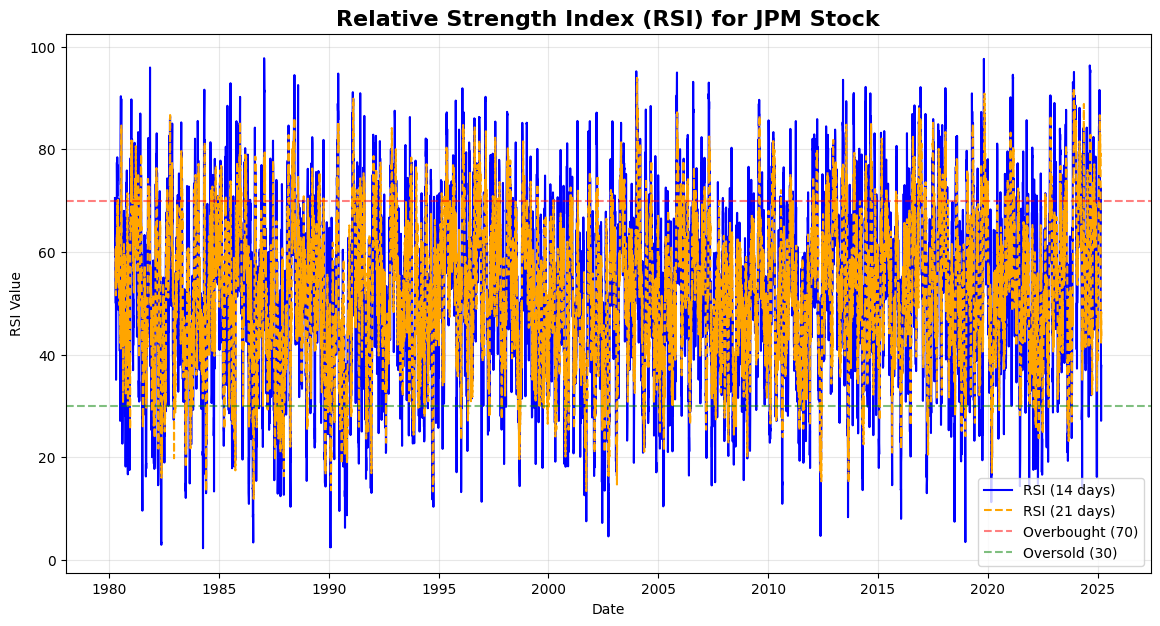

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['rsi_14'], label='RSI (14 days)', color='blue')
plt.plot(df['rsi_21'], label='RSI (21 days)', color='orange', linestyle='--')
plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for JPM Stock', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Moving average convergence divergence (macd)
exp12 = df['close'].ewm(span=12).mean()
exp26 = df['close'].ewm(span=26).mean()
df['macd'] = exp12 - exp26
df['macd_signal'] = df['macd'].ewm(span=9).mean()
df.head()

open      high       low     close  adj_close  volume   returns  \
date                                                                          
1980-03-18   0.0  5.111111  5.037037  5.074074   1.067288   64125  0.735291   
1980-03-19   0.0  5.166667  5.111111  5.148148   1.082870   40500  1.459858   
1980-03-20   0.0  5.148148  5.092593  5.111111   1.075079   18900 -0.719422   
1980-03-21   0.0  5.222222  5.111111  5.222222   1.098450   97200  2.173905   
1980-03-24   0.0  5.185185  5.092593  5.092593   1.071184   90450 -2.482251   

            log_returns  rolling_mean  rolling_std  price_range  price_gap  \
date                                                                         
1980-03-18     0.732601           NaN          NaN     1.459858        NaN   
1980-03-19     1.449305           NaN          NaN     1.079142     -100.0   
1980-03-20    -0.722022           NaN          NaN     1.086943     -100.0   
1980-03-21     2.150612           NaN          NaN     2.127652     -100.0   
1980-03-24    -2.513578           NaN          NaN     1.818165     -100.0   

            volatility_5  realized_vol_5  volatility_10  realized_vol_10  \
date                                                                       
1980-03-18           NaN             NaN            NaN              NaN   
1980-03-19           NaN             NaN            NaN              NaN   
1980-03-20           NaN             NaN            NaN              NaN   
1980-03-21           NaN             NaN            NaN              NaN   
1980-03-24      1.857706       44.692576            NaN              NaN   

            volatility_20  realized_vol_20  volatility_50  realized_vol_50  \
date                                                                         
1980-03-18            NaN              NaN            NaN              NaN   
1980-03-19            NaN              NaN            NaN              NaN   
1980-03-20            NaN              NaN            NaN              NaN   
1980-03-21            NaN              NaN            NaN              NaN   
1980-03-24            NaN              NaN            NaN              NaN   

              sma_5     ema_5  sma_10    ema_10  sma_20    ema_20  sma_50  \
date                                                                        
1980-03-18      NaN  5.074074     NaN  5.074074     NaN  5.074074     NaN   
1980-03-19      NaN  5.118518     NaN  5.114815     NaN  5.112963     NaN   
1980-03-20      NaN  5.115010     NaN  5.113326     NaN  5.112283     NaN   
1980-03-21      NaN  5.159544     NaN  5.149202     NaN  5.144021     NaN   
1980-03-24  5.12963  5.133842     NaN  5.132951     NaN  5.131581     NaN   

              ema_50  rsi_14  rsi_21      macd  macd_signal  
date                                                         
1980-03-18  5.074074     NaN     NaN  0.000000     0.000000  
1980-03-19  5.111852     NaN     NaN  0.001662     0.000923  
1980-03-20  5.111595     NaN     NaN  0.000969     0.000942  
1980-03-21  5.140933     NaN     NaN  0.004642     0.002195  
1980-03-24  5.130476     NaN     NaN  0.001382     0.001953

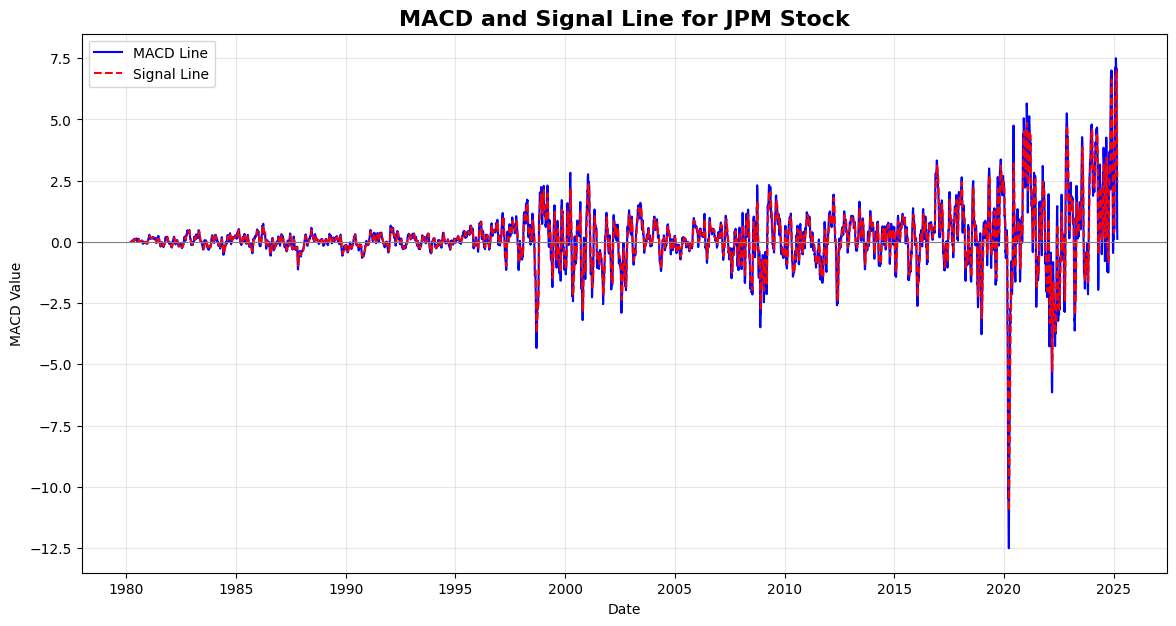

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['macd'], label='MACD Line', color='blue')
plt.plot(df['macd_signal'], label='Signal Line', color='red', linestyle='--')
plt.axhline(0, color='grey', linestyle='-', linewidth=0.8)
plt.title('MACD and Signal Line for JPM Stock', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Bollinger Bands
for window in [20, 50]:
    sma = df['close'].rolling(window=window).mean()
    std = df['close'].rolling(window=window).std()
    df[f'bb_upper_{window}'] = sma + (std * 2)
    df[f'bb_lower_{window}'] = sma - (std * 2)
    df[f'bb_position_{window}'] = (df['close'] - sma) / (2 * std)
df.head()

open      high       low     close  adj_close  volume   returns  \
date                                                                          
1980-03-18   0.0  5.111111  5.037037  5.074074   1.067288   64125  0.735291   
1980-03-19   0.0  5.166667  5.111111  5.148148   1.082870   40500  1.459858   
1980-03-20   0.0  5.148148  5.092593  5.111111   1.075079   18900 -0.719422   
1980-03-21   0.0  5.222222  5.111111  5.222222   1.098450   97200  2.173905   
1980-03-24   0.0  5.185185  5.092593  5.092593   1.071184   90450 -2.482251   

            log_returns  rolling_mean  rolling_std  price_range  price_gap  \
date                                                                         
1980-03-18     0.732601           NaN          NaN     1.459858        NaN   
1980-03-19     1.449305           NaN          NaN     1.079142     -100.0   
1980-03-20    -0.722022           NaN          NaN     1.086943     -100.0   
1980-03-21     2.150612           NaN          NaN     2.127652     -100.0   
1980-03-24    -2.513578           NaN          NaN     1.818165     -100.0   

            volatility_5  realized_vol_5  volatility_10  realized_vol_10  \
date                                                                       
1980-03-18           NaN             NaN            NaN              NaN   
1980-03-19           NaN             NaN            NaN              NaN   
1980-03-20           NaN             NaN            NaN              NaN   
1980-03-21           NaN             NaN            NaN              NaN   
1980-03-24      1.857706       44.692576            NaN              NaN   

            volatility_20  realized_vol_20  volatility_50  realized_vol_50  \
date                                                                         
1980-03-18            NaN              NaN            NaN              NaN   
1980-03-19            NaN              NaN            NaN              NaN   
1980-03-20            NaN              NaN            NaN              NaN   
1980-03-21            NaN              NaN            NaN              NaN   
1980-03-24            NaN              NaN            NaN              NaN   

              sma_5     ema_5  sma_10    ema_10  sma_20    ema_20  sma_50  \
date                                                                        
1980-03-18      NaN  5.074074     NaN  5.074074     NaN  5.074074     NaN   
1980-03-19      NaN  5.118518     NaN  5.114815     NaN  5.112963     NaN   
1980-03-20      NaN  5.115010     NaN  5.113326     NaN  5.112283     NaN   
1980-03-21      NaN  5.159544     NaN  5.149202     NaN  5.144021     NaN   
1980-03-24  5.12963  5.133842     NaN  5.132951     NaN  5.131581     NaN   

              ema_50  rsi_14  rsi_21      macd  macd_signal  bb_upper_20  \
date                                                                       
1980-03-18  5.074074     NaN     NaN  0.000000     0.000000          NaN   
1980-03-19  5.111852     NaN     NaN  0.001662     0.000923          NaN   
1980-03-20  5.111595     NaN     NaN  0.000969     0.000942          NaN   
1980-03-21  5.140933     NaN     NaN  0.004642     0.002195          NaN   
1980-03-24  5.130476     NaN     NaN  0.001382     0.001953          NaN   

            bb_lower_20  bb_position_20  bb_upper_50  bb_lower_50  \
date                                                                
1980-03-18          NaN             NaN          NaN          NaN   
1980-03-19          NaN             NaN          NaN          NaN   
1980-03-20          NaN             NaN          NaN          NaN   
1980-03-21          NaN             NaN          NaN          NaN   
1980-03-24          NaN             NaN          NaN          NaN   

            bb_position_50  
date                        
1980-03-18             NaN  
1980-03-19             NaN  
1980-03-20             NaN  
1980-03-21             NaN  
1980-03-24             NaN

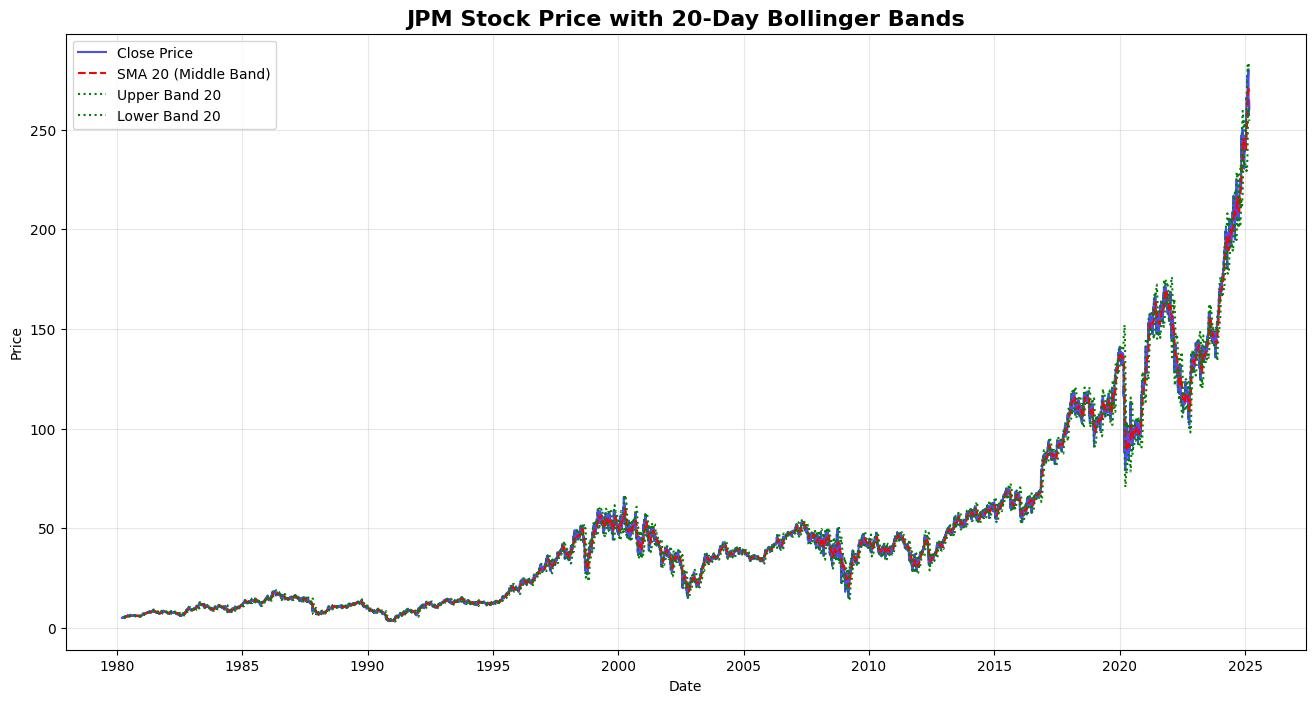

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df['close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(df['sma_20'], label='SMA 20 (Middle Band)', color='red', linestyle='--')
plt.plot(df['bb_upper_20'], label='Upper Band 20', color='green', linestyle=':')
plt.plot(df['bb_lower_20'], label='Lower Band 20', color='green', linestyle=':')
plt.title('JPM Stock Price with 20-Day Bollinger Bands', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

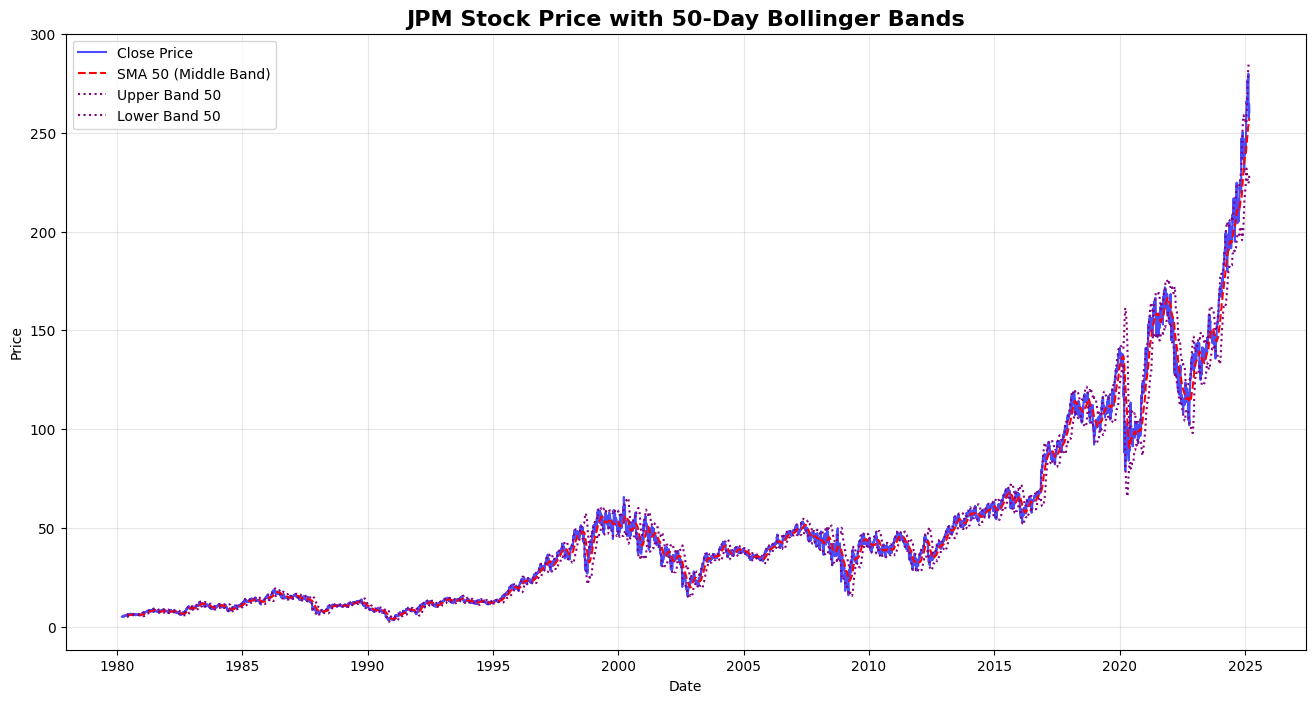

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df['close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(df['sma_50'], label='SMA 50 (Middle Band)', color='red', linestyle='--')
plt.plot(df['bb_upper_50'], label='Upper Band 50', color='purple', linestyle=':')
plt.plot(df['bb_lower_50'], label='Lower Band 50', color='purple', linestyle=':')
plt.title('JPM Stock Price with 50-Day Bollinger Bands', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Volume features
df['volume_sma_20'] = df['volume'].rolling(window=20).mean()
df['volume_ratio'] = df['volume'] / df['volume_sma_20']
df.head()

open      high       low     close  adj_close  volume   returns  \
date                                                                          
1980-03-18   0.0  5.111111  5.037037  5.074074   1.067288   64125  0.735291   
1980-03-19   0.0  5.166667  5.111111  5.148148   1.082870   40500  1.459858   
1980-03-20   0.0  5.148148  5.092593  5.111111   1.075079   18900 -0.719422   
1980-03-21   0.0  5.222222  5.111111  5.222222   1.098450   97200  2.173905   
1980-03-24   0.0  5.185185  5.092593  5.092593   1.071184   90450 -2.482251   

            log_returns  rolling_mean  rolling_std  price_range  price_gap  \
date                                                                         
1980-03-18     0.732601           NaN          NaN     1.459858        NaN   
1980-03-19     1.449305           NaN          NaN     1.079142     -100.0   
1980-03-20    -0.722022           NaN          NaN     1.086943     -100.0   
1980-03-21     2.150612           NaN          NaN     2.127652     -100.0   
1980-03-24    -2.513578           NaN          NaN     1.818165     -100.0   

            volatility_5  realized_vol_5  volatility_10  realized_vol_10  \
date                                                                       
1980-03-18           NaN             NaN            NaN              NaN   
1980-03-19           NaN             NaN            NaN              NaN   
1980-03-20           NaN             NaN            NaN              NaN   
1980-03-21           NaN             NaN            NaN              NaN   
1980-03-24      1.857706       44.692576            NaN              NaN   

            volatility_20  realized_vol_20  volatility_50  realized_vol_50  \
date                                                                         
1980-03-18            NaN              NaN            NaN              NaN   
1980-03-19            NaN              NaN            NaN              NaN   
1980-03-20            NaN              NaN            NaN              NaN   
1980-03-21            NaN              NaN            NaN              NaN   
1980-03-24            NaN              NaN            NaN              NaN   

              sma_5     ema_5  sma_10    ema_10  sma_20    ema_20  sma_50  \
date                                                                        
1980-03-18      NaN  5.074074     NaN  5.074074     NaN  5.074074     NaN   
1980-03-19      NaN  5.118518     NaN  5.114815     NaN  5.112963     NaN   
1980-03-20      NaN  5.115010     NaN  5.113326     NaN  5.112283     NaN   
1980-03-21      NaN  5.159544     NaN  5.149202     NaN  5.144021     NaN   
1980-03-24  5.12963  5.133842     NaN  5.132951     NaN  5.131581     NaN   

              ema_50  rsi_14  rsi_21      macd  macd_signal  bb_upper_20  \
date                                                                       
1980-03-18  5.074074     NaN     NaN  0.000000     0.000000          NaN   
1980-03-19  5.111852     NaN     NaN  0.001662     0.000923          NaN   
1980-03-20  5.111595     NaN     NaN  0.000969     0.000942          NaN   
1980-03-21  5.140933     NaN     NaN  0.004642     0.002195          NaN   
1980-03-24  5.130476     NaN     NaN  0.001382     0.001953          NaN   

            bb_lower_20  bb_position_20  bb_upper_50  bb_lower_50  \
date                                                                
1980-03-18          NaN             NaN          NaN          NaN   
1980-03-19          NaN             NaN          NaN          NaN   
1980-03-20          NaN             NaN          NaN          NaN   
1980-03-21          NaN             NaN          NaN          NaN   
1980-03-24          NaN             NaN          NaN          NaN   

            bb_position_50  volume_sma_20  volume_ratio  
date                                                     
1980-03-18             NaN            NaN           NaN  
1980-03-19             NaN            NaN           NaN  
1980-03-20             NaN            NaN 

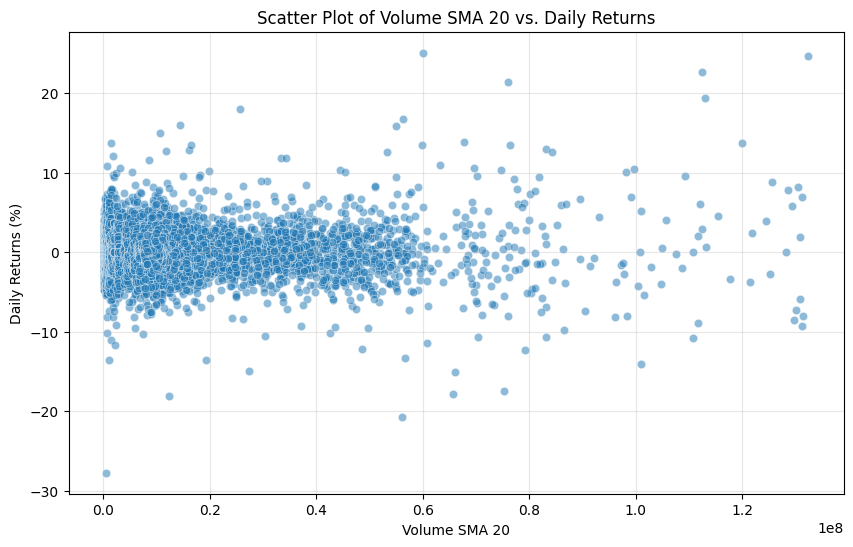

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['volume_sma_20'], y=df['returns'], alpha=0.5)
plt.title('Scatter Plot of Volume SMA 20 vs. Daily Returns')
plt.xlabel('Volume SMA 20')
plt.ylabel('Daily Returns (%)')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Lagged returns
for lag in [1, 2, 3, 5, 10]:
    df[f'return_lag_{lag}'] = df['returns'].shift(lag)
df.head()

open      high       low     close  adj_close  volume   returns  \
date                                                                          
1980-03-18   0.0  5.111111  5.037037  5.074074   1.067288   64125  0.735291   
1980-03-19   0.0  5.166667  5.111111  5.148148   1.082870   40500  1.459858   
1980-03-20   0.0  5.148148  5.092593  5.111111   1.075079   18900 -0.719422   
1980-03-21   0.0  5.222222  5.111111  5.222222   1.098450   97200  2.173905   
1980-03-24   0.0  5.185185  5.092593  5.092593   1.071184   90450 -2.482251   

            log_returns  rolling_mean  rolling_std  price_range  price_gap  \
date                                                                         
1980-03-18     0.732601           NaN          NaN     1.459858        NaN   
1980-03-19     1.449305           NaN          NaN     1.079142     -100.0   
1980-03-20    -0.722022           NaN          NaN     1.086943     -100.0   
1980-03-21     2.150612           NaN          NaN     2.127652     -100.0   
1980-03-24    -2.513578           NaN          NaN     1.818165     -100.0   

            volatility_5  realized_vol_5  volatility_10  realized_vol_10  \
date                                                                       
1980-03-18           NaN             NaN            NaN              NaN   
1980-03-19           NaN             NaN            NaN              NaN   
1980-03-20           NaN             NaN            NaN              NaN   
1980-03-21           NaN             NaN            NaN              NaN   
1980-03-24      1.857706       44.692576            NaN              NaN   

            volatility_20  realized_vol_20  volatility_50  realized_vol_50  \
date                                                                         
1980-03-18            NaN              NaN            NaN              NaN   
1980-03-19            NaN              NaN            NaN              NaN   
1980-03-20            NaN              NaN            NaN              NaN   
1980-03-21            NaN              NaN            NaN              NaN   
1980-03-24            NaN              NaN            NaN              NaN   

              sma_5     ema_5  sma_10    ema_10  sma_20    ema_20  sma_50  \
date                                                                        
1980-03-18      NaN  5.074074     NaN  5.074074     NaN  5.074074     NaN   
1980-03-19      NaN  5.118518     NaN  5.114815     NaN  5.112963     NaN   
1980-03-20      NaN  5.115010     NaN  5.113326     NaN  5.112283     NaN   
1980-03-21      NaN  5.159544     NaN  5.149202     NaN  5.144021     NaN   
1980-03-24  5.12963  5.133842     NaN  5.132951     NaN  5.131581     NaN   

              ema_50  rsi_14  rsi_21      macd  macd_signal  bb_upper_20  \
date                                                                       
1980-03-18  5.074074     NaN     NaN  0.000000     0.000000          NaN   
1980-03-19  5.111852     NaN     NaN  0.001662     0.000923          NaN   
1980-03-20  5.111595     NaN     NaN  0.000969     0.000942          NaN   
1980-03-21  5.140933     NaN     NaN  0.004642     0.002195          NaN   
1980-03-24  5.130476     NaN     NaN  0.001382     0.001953          NaN   

            bb_lower_20  bb_position_20  bb_upper_50  bb_lower_50  \
date                                                                
1980-03-18          NaN             NaN          NaN          NaN   
1980-03-19          NaN             NaN          NaN          NaN   
1980-03-20          NaN             NaN          NaN          NaN   
1980-03-21          NaN             NaN          NaN          NaN   
1980-03-24          NaN             NaN          NaN          NaN   

            bb_position_50  volume_sma_20  volume_ratio  return_lag_1  \
date                                                                    
1980-03-18             NaN            NaN           NaN           NaN   
1980-03-19             NaN            NaN           NaN

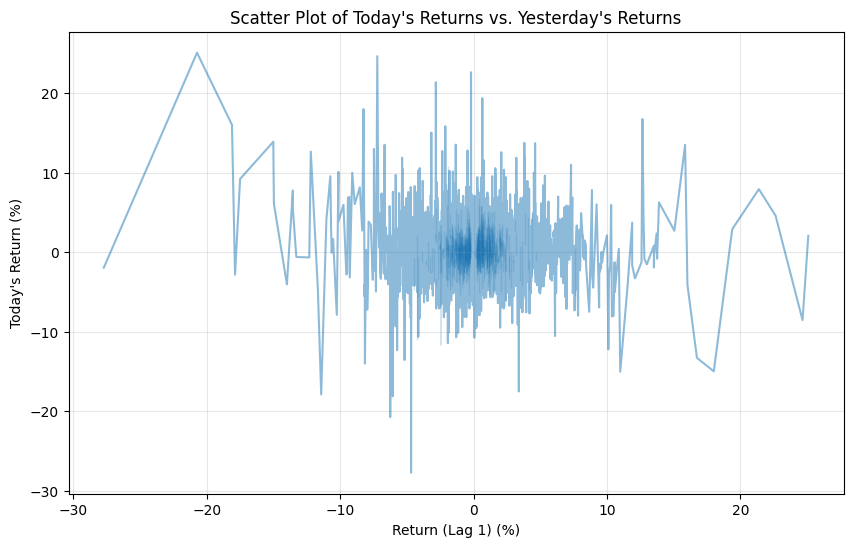

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['return_lag_1'], y=df['returns'], alpha=0.5)
plt.title('Scatter Plot of Today\'s Returns vs. Yesterday\'s Returns')
plt.xlabel('Return (Lag 1) (%)')
plt.ylabel('Today\'s Return (%)')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
for window in [22, 66, 252]:  # 1 month, 3 months, 1 year
    df[f'rolling_var_95_{window}'] = df['returns'].rolling(window=window).quantile(0.05)
    df[f'rolling_cvar_95_{window}'] = df['returns'].rolling(window=window).apply(
        lambda x: x[x <= x.quantile(0.05)].mean()
    )
df.head()

open      high       low     close  adj_close  volume   returns  \
date                                                                          
1980-03-18   0.0  5.111111  5.037037  5.074074   1.067288   64125  0.735291   
1980-03-19   0.0  5.166667  5.111111  5.148148   1.082870   40500  1.459858   
1980-03-20   0.0  5.148148  5.092593  5.111111   1.075079   18900 -0.719422   
1980-03-21   0.0  5.222222  5.111111  5.222222   1.098450   97200  2.173905   
1980-03-24   0.0  5.185185  5.092593  5.092593   1.071184   90450 -2.482251   

            log_returns  rolling_mean  rolling_std  price_range  price_gap  \
date                                                                         
1980-03-18     0.732601           NaN          NaN     1.459858        NaN   
1980-03-19     1.449305           NaN          NaN     1.079142     -100.0   
1980-03-20    -0.722022           NaN          NaN     1.086943     -100.0   
1980-03-21     2.150612           NaN          NaN     2.127652     -100.0   
1980-03-24    -2.513578           NaN          NaN     1.818165     -100.0   

            volatility_5  realized_vol_5  volatility_10  realized_vol_10  \
date                                                                       
1980-03-18           NaN             NaN            NaN              NaN   
1980-03-19           NaN             NaN            NaN              NaN   
1980-03-20           NaN             NaN            NaN              NaN   
1980-03-21           NaN             NaN            NaN              NaN   
1980-03-24      1.857706       44.692576            NaN              NaN   

            volatility_20  realized_vol_20  volatility_50  realized_vol_50  \
date                                                                         
1980-03-18            NaN              NaN            NaN              NaN   
1980-03-19            NaN              NaN            NaN              NaN   
1980-03-20            NaN              NaN            NaN              NaN   
1980-03-21            NaN              NaN            NaN              NaN   
1980-03-24            NaN              NaN            NaN              NaN   

              sma_5     ema_5  sma_10    ema_10  sma_20    ema_20  sma_50  \
date                                                                        
1980-03-18      NaN  5.074074     NaN  5.074074     NaN  5.074074     NaN   
1980-03-19      NaN  5.118518     NaN  5.114815     NaN  5.112963     NaN   
1980-03-20      NaN  5.115010     NaN  5.113326     NaN  5.112283     NaN   
1980-03-21      NaN  5.159544     NaN  5.149202     NaN  5.144021     NaN   
1980-03-24  5.12963  5.133842     NaN  5.132951     NaN  5.131581     NaN   

              ema_50  rsi_14  rsi_21      macd  macd_signal  bb_upper_20  \
date                                                                       
1980-03-18  5.074074     NaN     NaN  0.000000     0.000000          NaN   
1980-03-19  5.111852     NaN     NaN  0.001662     0.000923          NaN   
1980-03-20  5.111595     NaN     NaN  0.000969     0.000942          NaN   
1980-03-21  5.140933     NaN     NaN  0.004642     0.002195          NaN   
1980-03-24  5.130476     NaN     NaN  0.001382     0.001953          NaN   

            bb_lower_20  bb_position_20  bb_upper_50  bb_lower_50  \
date                                                                
1980-03-18          NaN             NaN          NaN          NaN   
1980-03-19          NaN             NaN          NaN          NaN   
1980-03-20          NaN             NaN          NaN          NaN   
1980-03-21          NaN             NaN          NaN          NaN   
1980-03-24          NaN             NaN          NaN          NaN   

            bb_position_50  volume_sma_20  volume_ratio  return_lag_1  \
date                                                                    
1980-03-18             NaN            NaN           NaN           NaN   
1980-03-19             NaN            NaN           NaN

In [ ]:
# Calculate breaches for rolling_var_95_66
breaches_66 = df['returns'][df['returns'] < df['rolling_var_95_66']]
num_breaches_66 = len(breaches_66)
total_periods_66 = len(df['rolling_var_95_66'].dropna())

print("=== Breach Rate for Rolling VaR 95% (66 days) ===")
print(f"Total number of VaR breaches: {num_breaches_66}")
print(f"Total periods where rolling VaR was calculated: {total_periods_66}")

if total_periods_66 > 0:
    breach_rate_66 = (num_breaches_66 / total_periods_66) * 100
    print(f"Breach rate: {breach_rate_66:.2f}%")
else:
    print("No periods to calculate breach rate for 66 days.")

print("\n" * 2)

# Calculate breaches for rolling_var_95_252
breaches_252 = df['returns'][df['returns'] < df['rolling_var_95_252']]
num_breaches_252 = len(breaches_252)
total_periods_252 = len(df['rolling_var_95_252'].dropna())

print("=== Breach Rate for Rolling VaR 95% (252 days) ===")
print(f"Total number of VaR breaches: {num_breaches_252}")
print(f"Total periods where rolling VaR was calculated: {total_periods_252}")

if total_periods_252 > 0:
    breach_rate_252 = (num_breaches_252 / total_periods_252) * 100
    print(f"Breach rate: {breach_rate_252:.2f}%")
else:
    print("No periods to calculate breach rate for 252 days.")

=== Breach Rate for Rolling VaR 95% (66 days) ===
Total number of VaR breaches: 716
Total periods where rolling VaR was calculated: 11267
Breach rate: 6.35%



=== Breach Rate for Rolling VaR 95% (252 days) ===
Total number of VaR breaches: 613
Total periods where rolling VaR was calculated: 11081
Breach rate: 5.53%


In [ ]:
# # Count VaR breaches
# num_breaches = len(breaches)

# # Get the total number of periods for which VaR was calculated
# total_periods = len(df['rolling_var_95_22'].dropna())

# print(f"Total number of VaR breaches (actual returns < rolling_var_95_22): {num_breaches}")
# print(f"Total periods where rolling VaR was calculated: {total_periods}")

# # Calculate the breach rate
# if total_periods > 0:
#     breach_rate = (num_breaches / total_periods) * 100
#     print(f"Breach rate: {breach_rate:.2f}%")
# else:
#     print("No periods to calculate breach rate.")

NameError: name 'breaches' is not defined

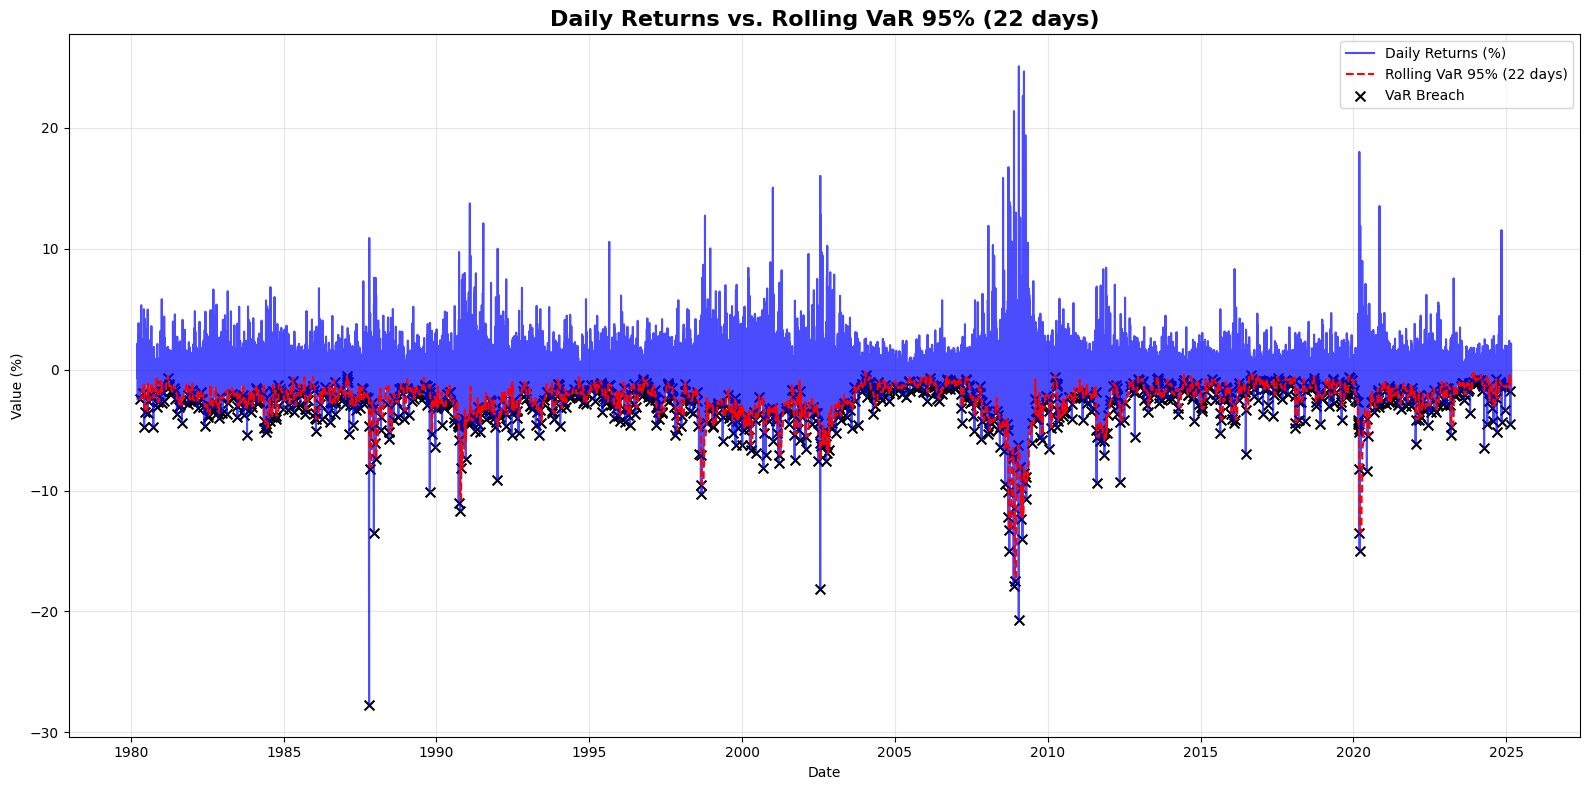

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df['returns'], label='Daily Returns (%)', color='blue', alpha=0.7)
plt.plot(df['rolling_var_95_22'], label='Rolling VaR 95% (22 days)', color='red', linestyle='--')

# Highlight VaR breaches (actual returns worse than VaR)
breaches = df['returns'][df['returns'] < df['rolling_var_95_22']]
plt.scatter(breaches.index, breaches, color='black', marker='x', s=50, label='VaR Breach')

plt.title('Daily Returns vs. Rolling VaR 95% (22 days)', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Value (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Relationship between Volume Ratio and Returns

In [ ]:
correlation = df['volume_ratio'].corr(df['returns'])
print(f"Correlation between Volume Ratio and Returns: {correlation:.4f}")

Correlation between Volume Ratio and Returns: 0.0192


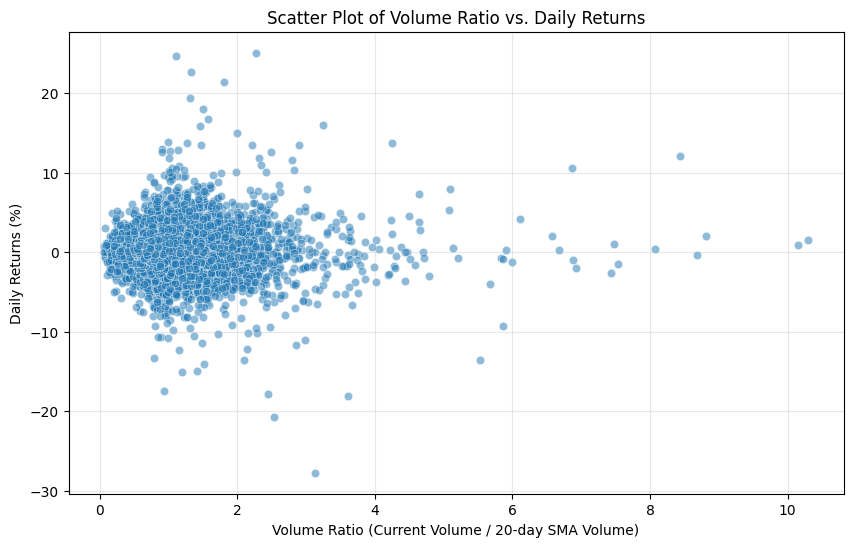

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['volume_ratio'], y=df['returns'], alpha=0.5)
plt.title('Scatter Plot of Volume Ratio vs. Daily Returns')
plt.xlabel('Volume Ratio (Current Volume / 20-day SMA Volume)')
plt.ylabel('Daily Returns (%)')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
feature_columns = [col for col in df.columns if col not in ['date', 'open', 'high', 'low', 'close', 'adj_close']]
feature_columns

['volume',
 'returns',
 'log_returns',
 'rolling_mean',
 'rolling_std',
 'price_range',
 'price_gap',
 'volatility_5',
 'realized_vol_5',
 'volatility_10',
 'realized_vol_10',
 'volatility_20',
 'realized_vol_20',
 'volatility_50',
 'realized_vol_50',
 'sma_5',
 'ema_5',
 'sma_10',
 'ema_10',
 'sma_20',
 'ema_20',
 'sma_50',
 'ema_50',
 'rsi_14',
 'rsi_21',
 'macd',
 'macd_signal',
 'bb_upper_20',
 'bb_lower_20',
 'bb_position_20',
 'bb_upper_50',
 'bb_lower_50',
 'bb_position_50',
 'volume_sma_20',
 'volume_ratio',
 'return_lag_1',
 'return_lag_2',
 'return_lag_3',
 'return_lag_5',
 'return_lag_10',
 'rolling_var_95_22',
 'rolling_cvar_95_22',
 'rolling_var_95_66',
 'rolling_cvar_95_66',
 'rolling_var_95_252',
 'rolling_cvar_95_252']

In [ ]:
numeric_data = df[feature_columns].select_dtypes(include=[np.number])
numeric_data.head()

volume   returns  log_returns  rolling_mean  rolling_std  \
date                                                                   
1980-03-18   64125  0.735291     0.732601           NaN          NaN   
1980-03-19   40500  1.459858     1.449305           NaN          NaN   
1980-03-20   18900 -0.719422    -0.722022           NaN          NaN   
1980-03-21   97200  2.173905     2.150612           NaN          NaN   
1980-03-24   90450 -2.482251    -2.513578           NaN          NaN   

            price_range  price_gap  volatility_5  realized_vol_5  \
date                                                               
1980-03-18     1.459858        NaN           NaN             NaN   
1980-03-19     1.079142     -100.0           NaN             NaN   
1980-03-20     1.086943     -100.0           NaN             NaN   
1980-03-21     2.127652     -100.0           NaN             NaN   
1980-03-24     1.818165     -100.0      1.857706       44.692576   

            volatility_10  realized_vol_10  volatility_20  realized_vol_20  \
date                                                                         
1980-03-18            NaN              NaN            NaN              NaN   
1980-03-19            NaN              NaN            NaN              NaN   
1980-03-20            NaN              NaN            NaN              NaN   
1980-03-21            NaN              NaN            NaN              NaN   
1980-03-24            NaN              NaN            NaN              NaN   

            volatility_50  realized_vol_50    sma_5     ema_5  sma_10  \
date                                                                    
1980-03-18            NaN              NaN      NaN  5.074074     NaN   
1980-03-19            NaN              NaN      NaN  5.118518     NaN   
1980-03-20            NaN              NaN      NaN  5.115010     NaN   
1980-03-21            NaN              NaN      NaN  5.159544     NaN   
1980-03-24            NaN              NaN  5.12963  5.133842     NaN   

              ema_10  sma_20    ema_20  sma_50    ema_50  rsi_14  rsi_21  \
date                                                                       
1980-03-18  5.074074     NaN  5.074074     NaN  5.074074     NaN     NaN   
1980-03-19  5.114815     NaN  5.112963     NaN  5.111852     NaN     NaN   
1980-03-20  5.113326     NaN  5.112283     NaN  5.111595     NaN     NaN   
1980-03-21  5.149202     NaN  5.144021     NaN  5.140933     NaN     NaN   
1980-03-24  5.132951     NaN  5.131581     NaN  5.130476     NaN     NaN   

                macd  macd_signal  bb_upper_20  bb_lower_20  bb_position_20  \
date                                                                          
1980-03-18  0.000000     0.000000          NaN          NaN             NaN   
1980-03-19  0.001662     0.000923          NaN          NaN             NaN   
1980-03-20  0.000969     0.000942          NaN          NaN             NaN   
1980-03-21  0.004642     0.002195          NaN          NaN             NaN   
1980-03-24  0.001382     0.001953          NaN          NaN             NaN   

            bb_upper_50  bb_lower_50  bb_position_50  volume_sma_20  \
date                                                                  
1980-03-18          NaN          NaN             NaN            NaN   
1980-03-19          NaN          NaN             NaN            NaN   
1980-03-20          NaN          NaN             NaN            NaN   
1980-03-21          NaN          NaN             NaN            NaN   
1980-03-24          NaN          NaN             NaN            NaN   

            volume_ratio  return_lag_1  return_lag_2  return_lag_3  \
date                                                                 
1980-03-18           NaN           NaN           NaN           NaN   
1980-03-19           NaN      0.735291           NaN           NaN   
1980-03-20           NaN      1.459858      0.735291           NaN   
1980-03-21           NaN     -0.7194

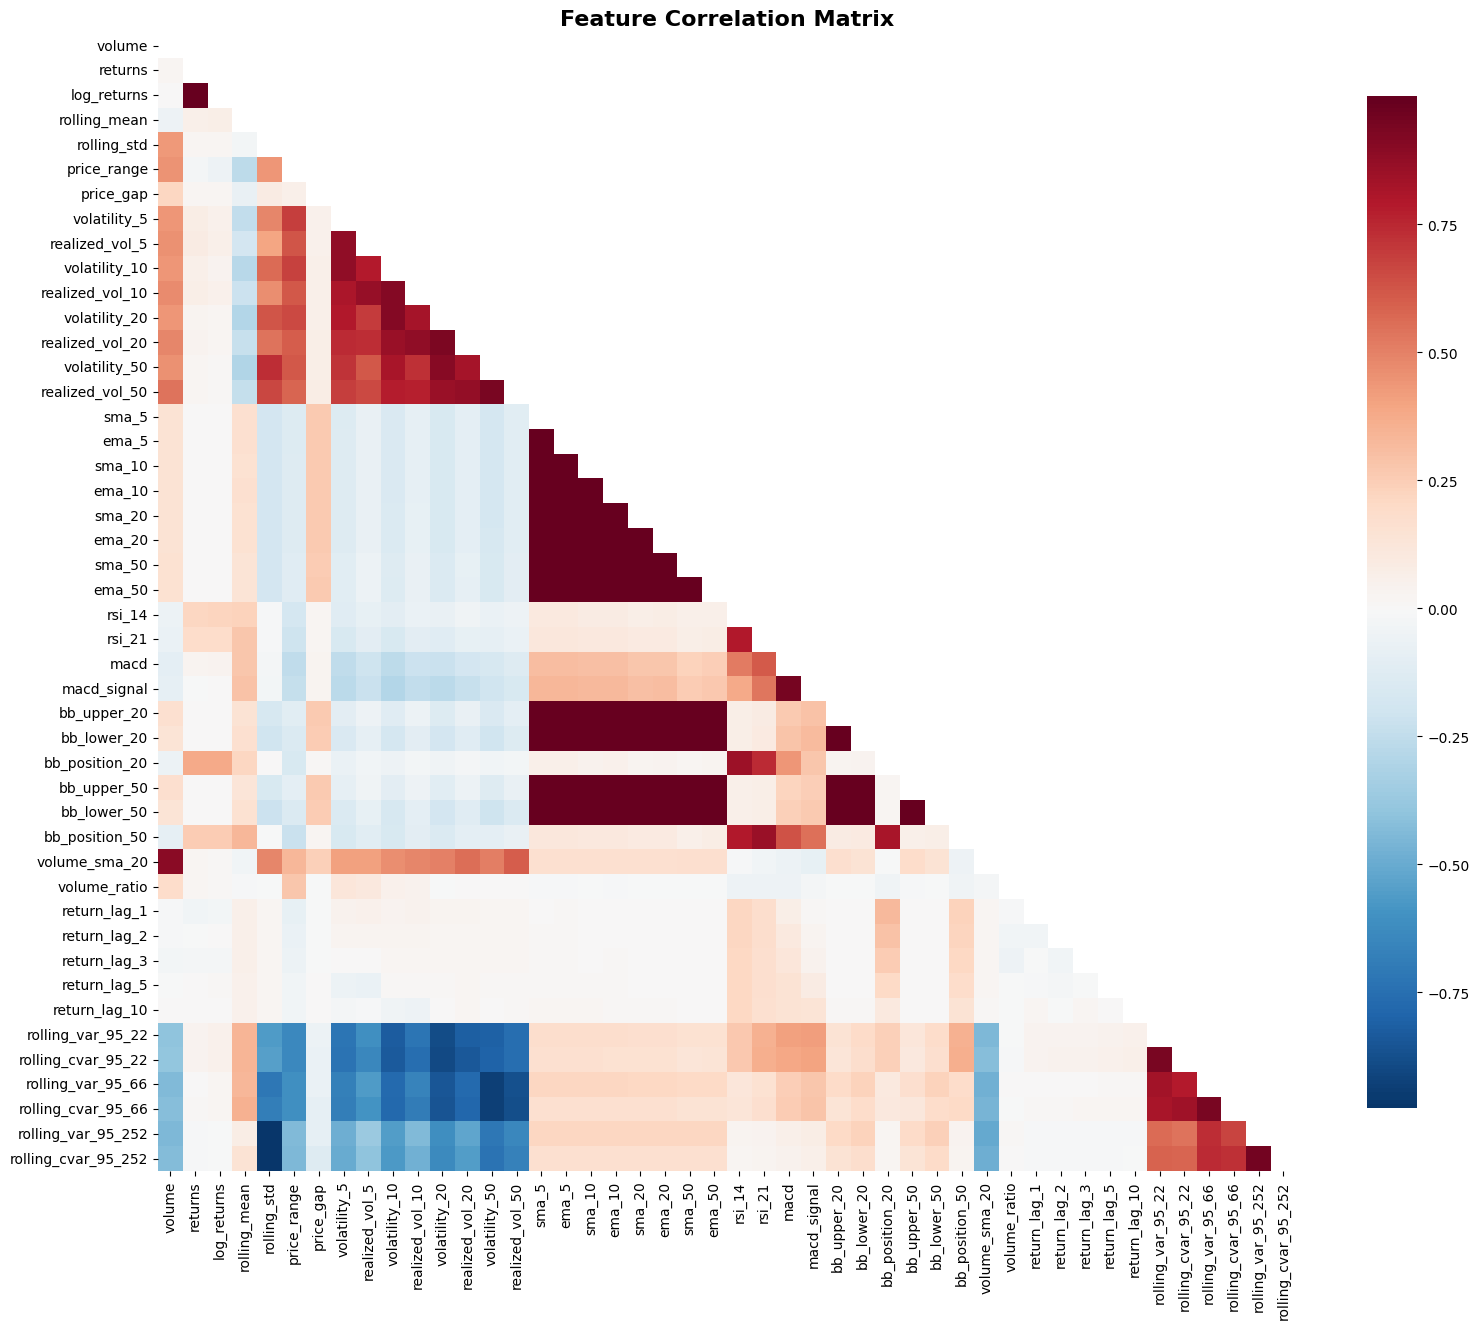

In [ ]:
plt.figure(figsize=(16, 14))
correlation_matrix = numeric_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, center=0, cmap='RdBu_r',
            square=True, annot=False, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

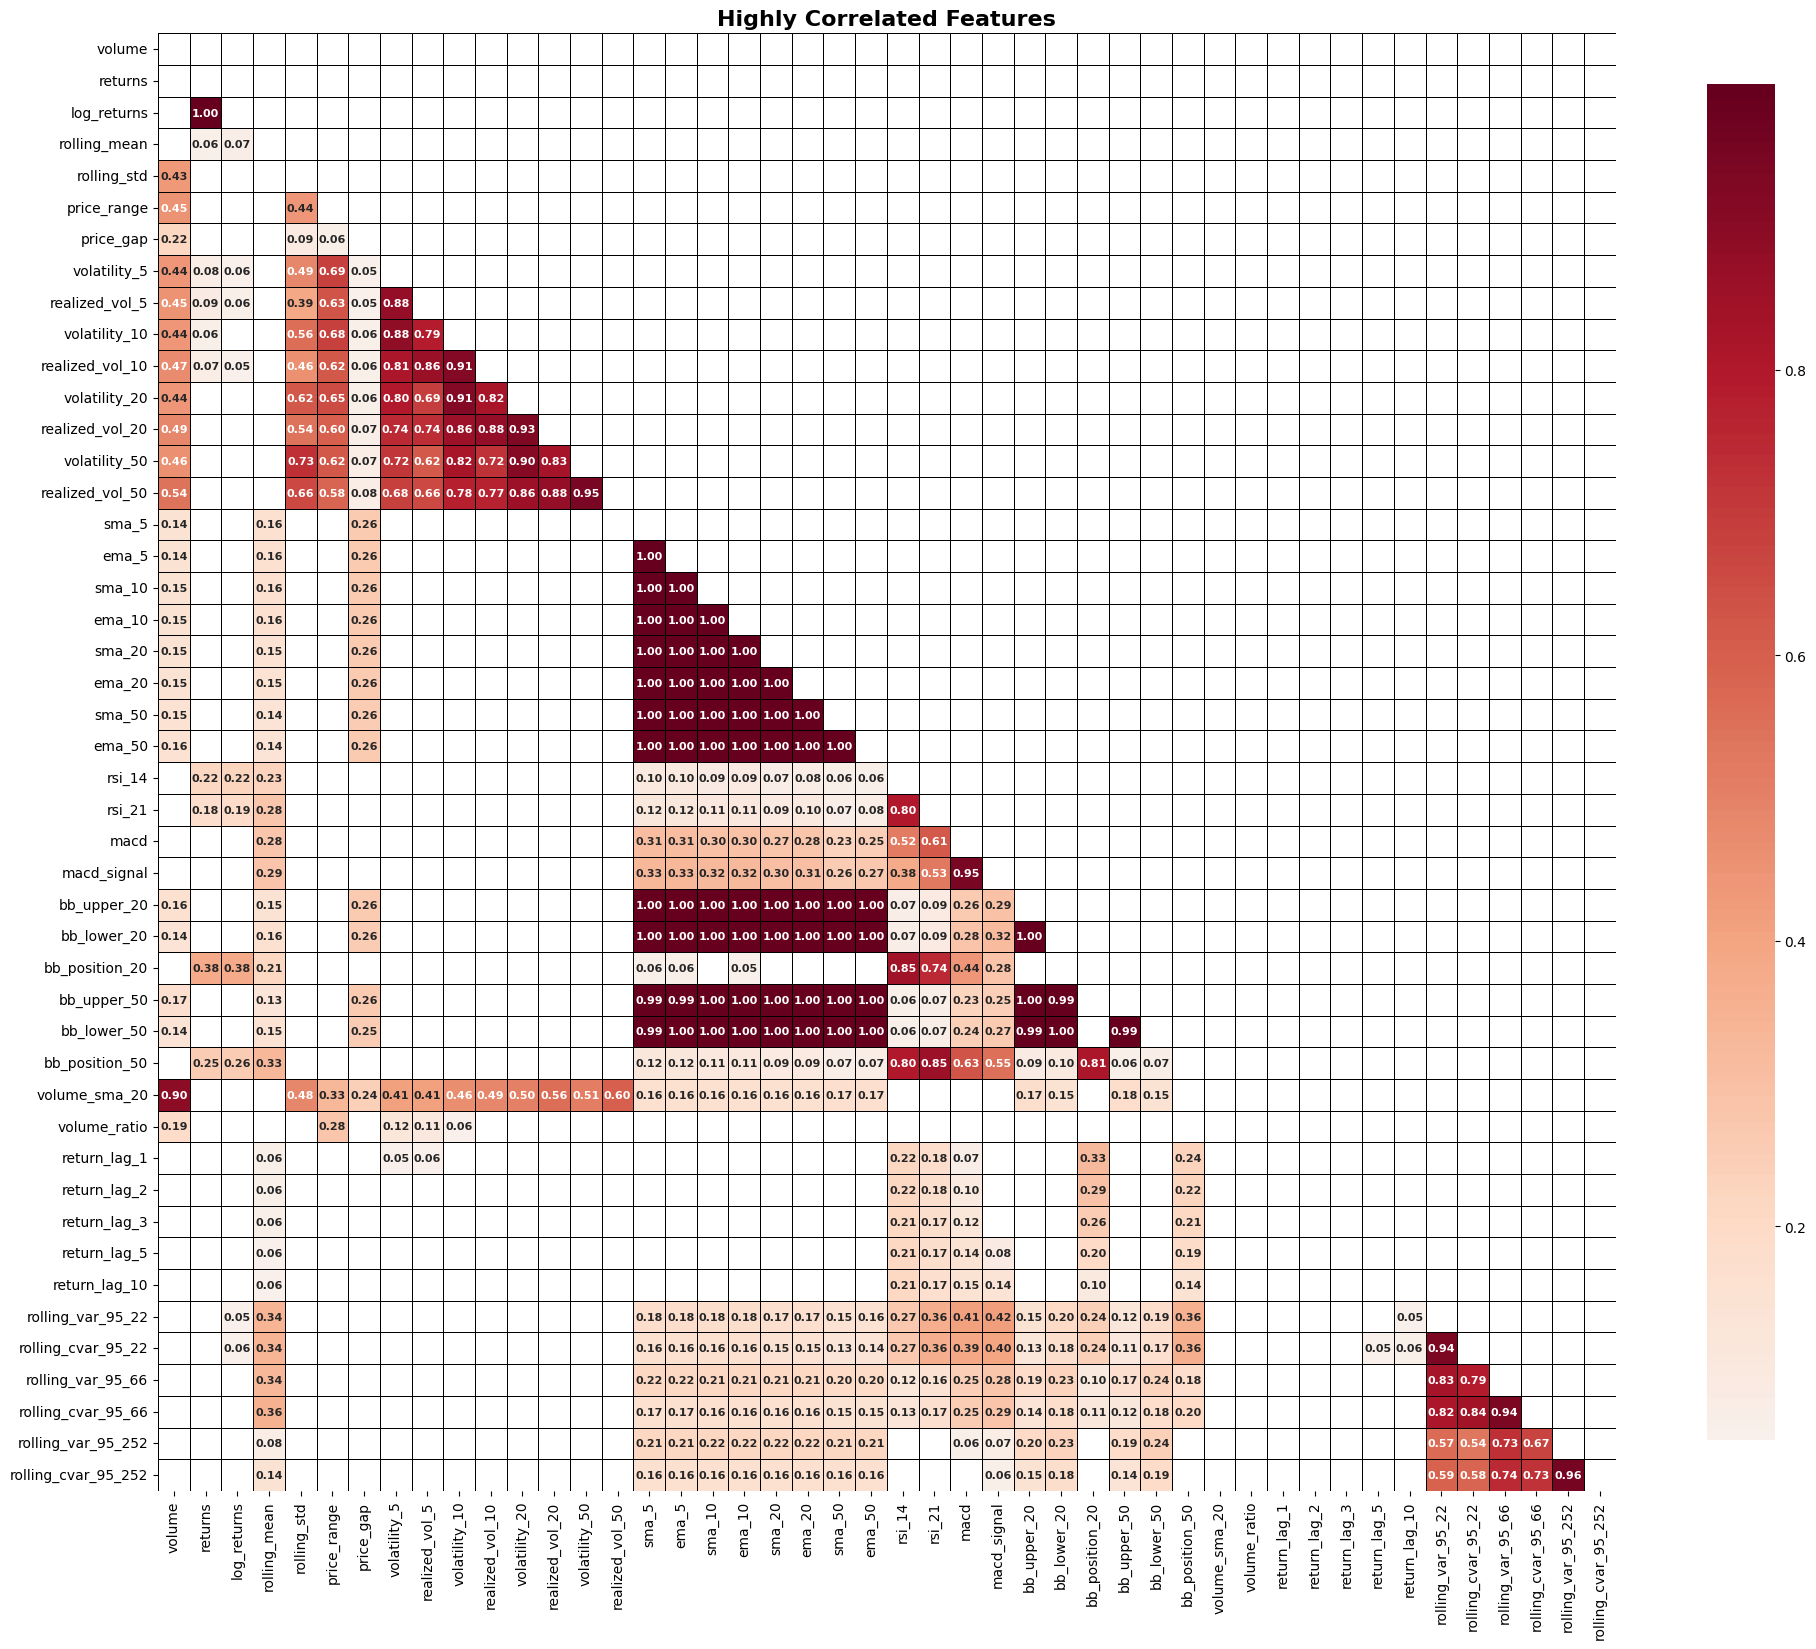

In [ ]:
plt.figure(figsize=(20, 18)) # Adjust figure size as needed
highly_corr = correlation_matrix[correlation_matrix > 0.05]
mask = np.triu(np.ones_like(highly_corr, dtype=bool))
sns.heatmap(highly_corr,mask=mask, center=0, cmap='RdBu_r',
            square=True, annot=True, fmt=".2f", # Format annotations to 2 decimal places
            cbar_kws={"shrink": 0.8}, annot_kws={'fontsize':8, 'fontweight':'bold'},
            linecolor='black', linewidths=0.5) # Add black lines with specified width
plt.title('Highly Correlated Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Top correlated features with returns
return_correlations = numeric_data.corr()['returns'].abs().sort_values(ascending=False)
print("features correlated with returns:")
print(return_correlations)

features correlated with returns:
returns                1.000000
log_returns            0.998984
bb_position_20         0.378889
bb_position_50         0.253096
rsi_14                 0.219462
rsi_21                 0.184087
realized_vol_5         0.087420
volatility_5           0.078818
realized_vol_10        0.072950
rolling_mean           0.063830
volatility_10          0.060967
rolling_cvar_95_22     0.037795
realized_vol_20        0.036660
rolling_var_95_22      0.036620
return_lag_1           0.034815
volatility_20          0.033228
macd                   0.031457
realized_vol_50        0.025966
rolling_std            0.023628
return_lag_3           0.023565
volatility_50          0.022813
price_range            0.022495
volume_sma_20          0.020036
volume_ratio           0.019200
volume                 0.018729
price_gap              0.017143
rolling_var_95_252     0.016520
rolling_cvar_95_252    0.015319
rolling_cvar_95_66     0.008601
macd_signal            0.007211
return

In [ ]:
type(return_correlations)
print("features highly correlated with returns:")
high_corr_features = return_correlations[return_correlations > 0.05]
high_corr_features

features highly correlated with returns:


returns            1.000000
log_returns        0.998984
bb_position_20     0.378889
bb_position_50     0.253096
rsi_14             0.219462
rsi_21             0.184087
realized_vol_5     0.087420
volatility_5       0.078818
realized_vol_10    0.072950
rolling_mean       0.063830
volatility_10      0.060967
Name: returns, dtype: float64

In [ ]:
high_corr_features.index

Index(['returns', 'log_returns', 'bb_position_20', 'bb_position_50', 'rsi_14',
       'rsi_21', 'realized_vol_5', 'volatility_5', 'realized_vol_10',
       'rolling_mean', 'volatility_10'],
      dtype='object')

In [ ]:
# class VaRModels:
#     """Implementation of various Value at Risk models"""

#     def __init__(self, returns, confidence_level=0.95):
#         self.returns = returns.dropna()
#         self.confidence_level = confidence_level
#         self.alpha = 1 - confidence_level

#     def historical_var(self, window=None):
#         """Historical Simulation VaR"""
#         if window is None:
#             return np.percentile(self.returns, self.alpha * 100)
#         else:
#             return self.returns.rolling(window=window).quantile(self.alpha)

#     def parametric_var(self, window=252):
#         """Parametric (Variance-Covariance) VaR"""
#         if window is None:
#             mu = self.returns.mean()
#             sigma = self.returns.std()
#             return mu + sigma * stats.norm.ppf(self.alpha)
#         else:
#             mu = self.returns.rolling(window=window).mean()
#             sigma = self.returns.rolling(window=window).std()
#             return mu + sigma * stats.norm.ppf(self.alpha)

#     def garch_var(self, train_size=0.7, horizon=1):
#         """GARCH-based VaR"""
#         # Split data
#         split_idx = int(len(self.returns) * train_size)
#         train_returns = self.returns[:split_idx]
#         test_returns = self.returns[split_idx:]

#         # Fit GARCH model
#         model = arch_model(train_returns, vol='Garch', p=1, q=1, dist='skewt')
#         fitted_model = model.fit(disp='off')

#         # Forecast
#         forecasts = fitted_model.forecast(horizon=horizon, start=split_idx)
#         conditional_volatility = np.sqrt(forecasts.variance.values.flatten())

#         # Calculate VaR
#         var_garch = stats.t.ppf(
#             self.alpha,
#             df=fitted_model.params['nu'],
#             loc=0,
#             scale=conditional_volatility
#         )

#         return var_garch[:len(test_returns)], test_returns

#     def monte_carlo_var(self, window=252, n_simulations=10000, horizon=1):
#         """Monte Carlo Simulation VaR"""
#         mc_var = []

#         for i in range(window, len(self.returns)):
#             recent_returns = self.returns[i-window:i]
#             mu = recent_returns.mean()
#             sigma = recent_returns.std()

#             # Generate simulations
#             simulations = np.random.normal(mu, sigma, (horizon, n_simulations))
#             portfolio_returns = simulations.sum(axis=0)

#             var_mc = np.percentile(portfolio_returns, self.alpha * 100)
#             mc_var.append(var_mc)

#         return mc_var

# # Initialize VaR models
# var_calculator = VaRModels(df['returns'], confidence_level=0.95)

# # Calculate different VaR measures
# historical_var = var_calculator.historical_var(window=252)
# parametric_var = var_calculator.parametric_var(window=252)
# garch_var_results, test_returns = var_calculator.garch_var()

In [ ]:
df.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'returns',
       'log_returns', 'rolling_mean', 'rolling_std', 'price_range',
       'price_gap', 'volatility_5', 'realized_vol_5', 'volatility_10',
       'realized_vol_10', 'volatility_20', 'realized_vol_20', 'volatility_50',
       'realized_vol_50', 'sma_5', 'ema_5', 'sma_10', 'ema_10', 'sma_20',
       'ema_20', 'sma_50', 'ema_50', 'rsi_14', 'rsi_21', 'macd', 'macd_signal',
       'bb_upper_20', 'bb_lower_20', 'bb_position_20', 'bb_upper_50',
       'bb_lower_50', 'bb_position_50', 'volume_sma_20', 'volume_ratio',
       'return_lag_1', 'return_lag_2', 'return_lag_3', 'return_lag_5',
       'return_lag_10', 'rolling_var_95_22', 'rolling_cvar_95_22',
       'rolling_var_95_66', 'rolling_cvar_95_66', 'rolling_var_95_252',
       'rolling_cvar_95_252'],
      dtype='object')

In [ ]:
df.head()

open      high       low     close  adj_close  volume   returns  \
date                                                                          
1980-03-18   0.0  5.111111  5.037037  5.074074   1.067288   64125  0.735291   
1980-03-19   0.0  5.166667  5.111111  5.148148   1.082870   40500  1.459858   
1980-03-20   0.0  5.148148  5.092593  5.111111   1.075079   18900 -0.719422   
1980-03-21   0.0  5.222222  5.111111  5.222222   1.098450   97200  2.173905   
1980-03-24   0.0  5.185185  5.092593  5.092593   1.071184   90450 -2.482251   

            log_returns  rolling_mean  rolling_std  price_range  price_gap  \
date                                                                         
1980-03-18     0.732601           NaN          NaN     1.459858        NaN   
1980-03-19     1.449305           NaN          NaN     1.079142     -100.0   
1980-03-20    -0.722022           NaN          NaN     1.086943     -100.0   
1980-03-21     2.150612           NaN          NaN     2.127652     -100.0   
1980-03-24    -2.513578           NaN          NaN     1.818165     -100.0   

            volatility_5  realized_vol_5  volatility_10  realized_vol_10  \
date                                                                       
1980-03-18           NaN             NaN            NaN              NaN   
1980-03-19           NaN             NaN            NaN              NaN   
1980-03-20           NaN             NaN            NaN              NaN   
1980-03-21           NaN             NaN            NaN              NaN   
1980-03-24      1.857706       44.692576            NaN              NaN   

            volatility_20  realized_vol_20  volatility_50  realized_vol_50  \
date                                                                         
1980-03-18            NaN              NaN            NaN              NaN   
1980-03-19            NaN              NaN            NaN              NaN   
1980-03-20            NaN              NaN            NaN              NaN   
1980-03-21            NaN              NaN            NaN              NaN   
1980-03-24            NaN              NaN            NaN              NaN   

              sma_5     ema_5  sma_10    ema_10  sma_20    ema_20  sma_50  \
date                                                                        
1980-03-18      NaN  5.074074     NaN  5.074074     NaN  5.074074     NaN   
1980-03-19      NaN  5.118518     NaN  5.114815     NaN  5.112963     NaN   
1980-03-20      NaN  5.115010     NaN  5.113326     NaN  5.112283     NaN   
1980-03-21      NaN  5.159544     NaN  5.149202     NaN  5.144021     NaN   
1980-03-24  5.12963  5.133842     NaN  5.132951     NaN  5.131581     NaN   

              ema_50  rsi_14  rsi_21      macd  macd_signal  bb_upper_20  \
date                                                                       
1980-03-18  5.074074     NaN     NaN  0.000000     0.000000          NaN   
1980-03-19  5.111852     NaN     NaN  0.001662     0.000923          NaN   
1980-03-20  5.111595     NaN     NaN  0.000969     0.000942          NaN   
1980-03-21  5.140933     NaN     NaN  0.004642     0.002195          NaN   
1980-03-24  5.130476     NaN     NaN  0.001382     0.001953          NaN   

            bb_lower_20  bb_position_20  bb_upper_50  bb_lower_50  \
date                                                                
1980-03-18          NaN             NaN          NaN          NaN   
1980-03-19          NaN             NaN          NaN          NaN   
1980-03-20          NaN             NaN          NaN          NaN   
1980-03-21          NaN             NaN          NaN          NaN   
1980-03-24          NaN             NaN          NaN          NaN   

            bb_position_50  volume_sma_20  volume_ratio  return_lag_1  \
date                                                                    
1980-03-18             NaN            NaN           NaN           NaN   
1980-03-19             NaN            NaN           NaN

In [ ]:
returns = df['returns'].dropna()
confidence_level = 0.95
alpha = 1 - confidence_level

In [ ]:
print("""Historical Simulation VaR""")
window=252
if window is None:
  historical_var = np.percentile(returns, alpha * 100)
else:
  historical_var = returns.rolling(window=window).quantile(alpha)
print(historical_var)

Historical Simulation VaR
date
1980-03-18         NaN
1980-03-19         NaN
1980-03-20         NaN
1980-03-21         NaN
1980-03-24         NaN
                ...   
2025-02-25   -1.928643
2025-02-26   -1.928643
2025-02-27   -1.928643
2025-02-28   -1.928643
2025-03-03   -1.928643
Name: returns, Length: 11332, dtype: float64


In [ ]:
print("""Parametric (Variance-Covariance) VaR""")
window=252
if window is None:
  mu = returns.mean()
  sigma = returns.std()
  parametric_var =  mu + sigma * stats.norm.ppf(alpha)
else :
  mu = returns.rolling(window=window).mean()
  sigma = returns.rolling(window=window).std()
  parametric_var =  mu + sigma * stats.norm.ppf(alpha)

print(parametric_var)

Parametric (Variance-Covariance) VaR
date
1980-03-18         NaN
1980-03-19         NaN
1980-03-20         NaN
1980-03-21         NaN
1980-03-24         NaN
                ...   
2025-02-25   -2.364181
2025-02-26   -2.364092
2025-02-27   -2.361824
2025-02-28   -2.362065
2025-03-03   -2.375854
Name: returns, Length: 11332, dtype: float64


In [ ]:
train_size=0.7
horizon=1 # (because series is 1 day interval)
split_idx = int(len(returns) * train_size) # so test_size = 0.3
train_returns = returns[:split_idx]
test_returns = returns[split_idx:]

# Fit GARCH model
model = arch_model(train_returns, vol='Garch', p=1, q=1, dist='skewt')
fitted_model = model.fit(disp='off')

print(f"model : {model}")
print(f"fitted_model : {fitted_model}")
print(f"fitted_model.params : \n {fitted_model.params}")



# Forecast
forecasts = fitted_model.forecast(horizon=horizon, start=split_idx)
conditional_volatility = np.sqrt(forecasts.variance.values.flatten())

print(f"forecasts : {forecasts}")
print(f"conditional_volatility : {conditional_volatility}")


# Calculate VaR
var_garch = stats.t.ppf(
    alpha,
    df=fitted_model.params['mu'],
    loc=0,
    scale=conditional_volatility
)


model : Constant Mean(constant: yes, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Standardized Skew Student's t distribution)
fitted_model :                            Constant Mean - GARCH Model Results                           
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -16277.9
Distribution:      Standardized Skew Student's t   AIC:                           32567.9
Method:                       Maximum Likelihood   BIC:                           32609.7
                                                   No. Observations:                 7932
Date:                           Sun, Nov 16 2025   Df Residuals:                     7931
Time:                                   03:23:43   Df Model:                            1
                                 

In [ ]:
class VaRModels:
    """Implementation of various Value at Risk models"""

    def __init__(self, returns, confidence_level=0.95):
        self.returns = returns.dropna()
        self.confidence_level = confidence_level
        self.alpha = 1 - confidence_level

    def historical_var(self, window=None):
        """Historical Simulation VaR"""
        if window is None:
            return np.percentile(self.returns, self.alpha * 100)
        else:
            return self.returns.rolling(window=window).quantile(self.alpha)

    def parametric_var(self, window=252):
        """Parametric (Variance-Covariance) VaR"""
        if window is None:
            mu = self.returns.mean()
            sigma = self.returns.std()
            return mu + sigma * stats.norm.ppf(self.alpha)
        else:
            mu = self.returns.rolling(window=window).mean()
            sigma = self.returns.rolling(window=window).std()
            return mu + sigma * stats.norm.ppf(self.alpha)

    def garch_var(self, train_size=0.7, horizon=1):
        """GARCH-based VaR"""
        # Split data
        split_idx = int(len(self.returns) * train_size)
        train_returns = self.returns[:split_idx]
        test_returns = self.returns[split_idx:]

        # Fit GARCH model
        model = arch_model(train_returns, vol='Garch', p=1, q=1, dist='skewt')
        fitted_model = model.fit(disp='off')

        # Forecast
        forecasts = fitted_model.forecast(horizon=horizon, start=split_idx)
        conditional_volatility = np.sqrt(forecasts.variance.values.flatten())

        # Calculate VaR
        var_garch = stats.t.ppf(
            self.alpha,
            df=fitted_model.params['mu'],
            loc=0,
            scale=conditional_volatility
        )

        return var_garch[:len(test_returns)], test_returns

    def monte_carlo_var(self, window=252, n_simulations=10000, horizon=1):
        """Monte Carlo Simulation VaR"""
        mc_var = []

        for i in range(window, len(self.returns)):
            recent_returns = self.returns[i-window:i]
            mu = recent_returns.mean()
            sigma = recent_returns.std()

            # Generate simulations
            simulations = np.random.normal(mu, sigma, (horizon, n_simulations))
            portfolio_returns = simulations.sum(axis=0)

            var_mc = np.percentile(portfolio_returns, self.alpha * 100)
            mc_var.append(var_mc)

        return mc_var

# Initialize VaR models
var_calculator = VaRModels(df['returns'], confidence_level=0.95)

# Calculate different VaR measures
historical_var = var_calculator.historical_var(window=252)
parametric_var = var_calculator.parametric_var(window=252)
garch_var_results, test_returns = var_calculator.garch_var()
garch_var_results, test_returns

(array([], dtype=float64),
 date
 2011-08-24    3.018985
 2011-08-25   -0.307007
 2011-08-26    1.371774
 2011-08-29    3.949186
 2011-08-30   -1.540909
                 ...   
 2025-02-25   -1.507616
 2025-02-26    0.540021
 2025-02-27    0.100460
 2025-02-28    2.161747
 2025-03-03   -1.522765
 Name: returns, Length: 3400, dtype: float64)

In [ ]:
def fit_garch_models(returns):
    """Fit various GARCH models and compare their performance"""

    models = {}
    results = {}

    # Define different GARCH specifications
    specifications = {
        'GARCH(1,1)': {'p': 1, 'q': 1, 'vol': 'Garch'},
        'GARCH(1,2)': {'p': 1, 'q': 2, 'vol': 'Garch'},
        'GARCH(2,1)': {'p': 2, 'q': 1, 'vol': 'Garch'},
        'EGARCH(1,1)': {'p': 1, 'q': 1, 'vol': 'EGarch'},
        'GJR-GARCH(1,1)': {'p': 1, 'q': 1, 'vol': 'Garch', 'o': 1}
    }

    # Split data for training and testing
    split_idx = int(len(returns) * 0.8)
    train_returns = returns[:split_idx]
    test_returns = returns[split_idx:]

    print("Fitting GARCH models...")
    for name, specs in specifications.items():
        try:
            if 'EGARCH' in name:
                model = arch_model(train_returns, vol='EGarch', p=specs['p'], q=specs['q'], dist='skewt')
            elif 'GJR' in name:
                model = arch_model(train_returns, vol='Garch', p=specs['p'], o=specs['o'], q=specs['q'], dist='skewt')
            else:
                model = arch_model(train_returns, vol=specs['vol'], p=specs['p'], q=specs['q'], dist='skewt')

            fitted_model = model.fit(disp='off', show_warning=False)
            models[name] = fitted_model
            results[name] = {
                'aic': fitted_model.aic,
                'bic': fitted_model.bic,
                'params': fitted_model.params,
                'conditional_volatility': fitted_model.conditional_volatility
            }
            print(f"{name}: AIC={fitted_model.aic:.2f}, BIC={fitted_model.bic:.2f}")

        except Exception as e:
            print(f"Failed to fit {name}: {str(e)}")

    # Select best model based on AIC
    if results:
        best_model_name = min(results.keys(), key=lambda x: results[x]['aic'])
        print(f"\nBest model: {best_model_name} (AIC: {results[best_model_name]['aic']:.2f})")

        # Forecast with best model
        best_model = models[best_model_name]
        forecasts = best_model.forecast(horizon=1, start=split_idx)
        forecast_volatility = np.sqrt(forecasts.variance.values.flatten())[:len(test_returns)]

        return best_model, forecast_volatility, test_returns, results
    else:
        return None, None, None, None

# Fit GARCH models
garch_model, garch_volatility, garch_test_returns, garch_results = fit_garch_models(df['returns'])

Fitting GARCH models...
GARCH(1,1): AIC=36645.79, BIC=36688.47
GARCH(1,2): AIC=36640.29, BIC=36690.08
GARCH(2,1): AIC=36647.79, BIC=36697.58
EGARCH(1,1): AIC=36624.31, BIC=36666.98
GJR-GARCH(1,1): AIC=36573.92, BIC=36623.71

Best model: GJR-GARCH(1,1) (AIC: 36573.92)


In [ ]:
def fit_garch_model(returns, p=1, q=1, dist='normal'):
    """
    Fit GARCH model to returns data

    Parameters:
    returns: pd.Series of log returns
    p: GARCH order
    q: ARCH order
    dist: error distribution ('normal', 't', 'skewt')
    """

    # Remove NaN values
    returns_clean = returns.dropna()

    print(f"Fitting GARCH({p},{q}) model with {dist} distribution...")

    # Initialize and fit GARCH model
    model = arch_model(returns_clean, vol='Garch', p=p, q=q, dist=dist)
    garch_fit = model.fit(disp='off')

    # Print model summary
    print(garch_fit.summary())

    return garch_fit

def garch_forecast_volatility(garch_fit, returns, horizon=1):
    """Forecast volatility using fitted GARCH model"""

    # Get in-sample volatility forecasts
    volatility_forecast = garch_fit.conditional_volatility

    # Out-of-sample forecasts
    forecast = garch_fit.forecast(horizon=horizon)
    forecast_variance = forecast.variance.iloc[-1:]

    print(f"\nGARCH Volatility Forecast (Horizon: {horizon} days):")
    for i in range(horizon):
        print(f"Day {i+1}: {np.sqrt(forecast_variance.iloc[0, i]):.6f}")

    return volatility_forecast, forecast_variance

# Fit GARCH model
garch_fit = fit_garch_model(df['log_returns'], p=1, q=1, dist='t')
print(f"garch_fit : {garch_fit}")
# Forecast volatility
garch_volatility, forecast_var = garch_forecast_volatility(garch_fit, df['log_returns'])
print(f"garch_volatility : {garch_volatility},\n forecast_var: {forecast_var}")

Fitting GARCH(1,1) model with t distribution...
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -22274.8
Distribution:      Standardized Student's t   AIC:                           44559.7
Method:                  Maximum Likelihood   BIC:                           44596.4
                                              No. Observations:                11332
Date:                      Sun, Nov 16 2025   Df Residuals:                    11331
Time:                              03:24:19   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
---------------------------------

In [ ]:
class VaRModels:
    """Class implementing different VaR methodologies"""

    def __init__(self, returns, confidence_level=0.95):
        self.returns = returns.dropna()
        self.confidence_level = confidence_level
        self.alpha = 1 - confidence_level

    def historical_var(self, window=None):
        """Historical Simulation VaR"""
        if window is None:
            # Use full history
            var = -np.percentile(self.returns, self.alpha * 100)
        else:
            # Rolling window approach
            var_series = -self.returns.rolling(window=window).quantile(self.alpha)
            var = var_series.iloc[-1] if not var_series.empty else np.nan

        return var

    def parametric_var(self, volatility=None):
        """Parametric (Variance-Covariance) VaR"""
        if volatility is None:
            # Use sample standard deviation
            mu = self.returns.mean()
            sigma = self.returns.std()
        else:
            # Use provided volatility (e.g., from GARCH)
            mu = 0  # Often assumed zero for short horizons
            sigma = volatility.iloc[-1] if hasattr(volatility, 'iloc') else volatility

        # Using normal distribution
        z_score = stats.norm.ppf(1 - self.alpha)
        var = -(mu + z_score * sigma)

        return var

    def garch_var(self, garch_fit, horizon=1):
        """GARCH-based VaR"""
        # Forecast variance
        forecast = garch_fit.forecast(horizon=horizon)
        forecast_variance = forecast.variance.iloc[-1].values[0]
        forecast_volatility = np.sqrt(forecast_variance)

        # Assuming zero mean for simplicity
        z_score = stats.norm.ppf(1 - self.alpha)
        var = -(z_score * forecast_volatility)

        return var, forecast_volatility

    def calculate_all_var(self, garch_fit=None, window=252):
        """Calculate all VaR measures"""

        print(f"\nVaR Calculations (Confidence Level: {self.confidence_level*100}%)")
        print("=" * 50)

        # Historical VaR
        hist_var = self.historical_var(window=window)
        print(f"Historical Simulation VaR: {hist_var:.4f}")

        # Parametric VaR (sample)
        param_var_sample = self.parametric_var()
        print(f"Parametric VaR (Sample Vol): {param_var_sample:.4f}")

        # Parametric VaR (GARCH vol)
        if garch_fit is not None:
            garch_vol = garch_fit.conditional_volatility.iloc[-1]
            param_var_garch = self.parametric_var(volatility=garch_vol)
            print(f"Parametric VaR (GARCH Vol): {param_var_garch:.4f}")

            # GARCH VaR
            garch_var_val, garch_vol_forecast = self.garch_var(garch_fit)
            print(f"GARCH-based VaR: {garch_var_val:.4f}")
            print(f"GARCH Volatility Forecast: {garch_vol_forecast:.4f}")

        return {
            'historical_var': hist_var,
            'parametric_var_sample': param_var_sample,
            'parametric_var_garch': param_var_garch if garch_fit is not None else None,
            'garch_var': garch_var_val if garch_fit is not None else None
        }

# Initialize VaR calculator
var_calculator = VaRModels(df['log_returns'], confidence_level=0.95)
print(f"var_calculator : {var_calculator}")
# Calculate all VaR measures
var_results = var_calculator.calculate_all_var(garch_fit=garch_fit)
print(f"var_results : {var_results}")

var_calculator : <__main__.VaRModels object at 0x7cb8541c0650>

VaR Calculations (Confidence Level: 95.0%)
Historical Simulation VaR: 1.9475
Parametric VaR (Sample Vol): -3.6824
Parametric VaR (GARCH Vol): -2.6028
GARCH-based VaR: -2.6143
GARCH Volatility Forecast: 1.5894
var_results : {'historical_var': np.float64(1.9475071616039523), 'parametric_var_sample': np.float64(-3.682394441526209), 'parametric_var_garch': np.float64(-2.60279670142601), 'garch_var': np.float64(-2.61427991551431)}


In [ ]:
def backtest_var(returns, var_series, confidence_level=0.95):
    """
    Backtest VaR model by counting exceptions

    Parameters:
    returns: actual returns
    var_series: VaR estimates (same length as returns)
    confidence_level: VaR confidence level
    """

    # Align data
    data = pd.DataFrame({
        'returns': returns,
        'var': var_series
    }).dropna()

    # Identify exceptions (returns < -VaR)
    data['exception'] = data['returns'] < -data['var']
    n_exceptions = data['exception'].sum()
    n_observations = len(data)
    exception_rate = n_exceptions / n_observations
    expected_exceptions = (1 - confidence_level) * n_observations

    print(f"\nBacktesting Results:")
    print("=" * 30)
    print(f"Total observations: {n_observations}")
    print(f"Expected exceptions: {expected_exceptions:.1f}")
    print(f"Actual exceptions: {n_exceptions}")
    print(f"Exception rate: {exception_rate:.4f} (Target: {1-confidence_level:.3f})")

    # Kupiec's POF test (Proportion of Failures test)
    if n_exceptions > 0:
        likelihood_ratio = -2 * np.log(
            ((1 - (1-confidence_level)) ** (n_observations - n_exceptions) *
             (1-confidence_level) ** n_exceptions) /
            ((1 - exception_rate) ** (n_observations - n_exceptions) *
             exception_rate ** n_exceptions)
        )
        p_value = 1 - stats.chi2.cdf(likelihood_ratio, 1)
        print(f"Kupiec POF Test p-value: {p_value:.4f}")

        if p_value < 0.05:
            print("REJECT null hypothesis - VaR model may be inadequate")
        else:
            print("FAIL TO REJECT null hypothesis - VaR model appears adequate")

    return data

def create_rolling_var_series(returns, garch_fit, window=252, confidence_level=0.95):
    """Create rolling VaR series for backtesting"""

    var_historical = []
    var_parametric = []
    var_garch = []

    returns_clean = returns.dropna()

    for i in range(window, len(returns_clean)):
        # Current window of data
        current_returns = returns_clean.iloc[:i]

        # Historical VaR
        var_calc = VaRModels(current_returns, confidence_level)
        hist_var = var_calc.historical_var()
        var_historical.append(hist_var)

        # Parametric VaR (sample)
        param_var = var_calc.parametric_var()
        var_parametric.append(param_var)

        # GARCH VaR - refit model on current window
        try:
            garch_temp = arch_model(current_returns, vol='Garch', p=1, q=1).fit(disp='off')
            garch_var_val, _ = var_calc.garch_var(garch_temp)
            var_garch.append(garch_var_val)
        except:
            var_garch.append(np.nan)

    # Create results dataframe
    results_df = pd.DataFrame({
        'returns': returns_clean.iloc[window:],
        'historical_var': var_historical,
        'parametric_var': var_parametric,
        'garch_var': var_garch
    }, index=returns_clean.index[window:])

    return results_df

# Create rolling VaR series for backtesting
print("Creating rolling VaR series for backtesting...")
var_series = create_rolling_var_series(df['log_returns'], garch_fit)

# Backtest each model
print("\nBacktesting Historical VaR:")
backtest_historical = backtest_var(var_series['returns'], var_series['historical_var'])

print("\nBacktesting Parametric VaR:")
backtest_parametric = backtest_var(var_series['returns'], var_series['parametric_var'])

print("\nBacktesting GARCH VaR:")
backtest_garch = backtest_var(var_series['returns'], var_series['garch_var'])

Creating rolling VaR series for backtesting...

Backtesting Historical VaR:

Backtesting Results:
Total observations: 11080
Expected exceptions: 554.0
Actual exceptions: 643
Exception rate: 0.0580 (Target: 0.050)
Kupiec POF Test p-value: nan
FAIL TO REJECT null hypothesis - VaR model appears adequate

Backtesting Parametric VaR:

Backtesting Results:
Total observations: 11080
Expected exceptions: 554.0
Actual exceptions: 10565
Exception rate: 0.9535 (Target: 0.050)
Kupiec POF Test p-value: nan
FAIL TO REJECT null hypothesis - VaR model appears adequate

Backtesting GARCH VaR:

Backtesting Results:
Total observations: 11080
Expected exceptions: 554.0
Actual exceptions: 10574
Exception rate: 0.9543 (Target: 0.050)
Kupiec POF Test p-value: nan
FAIL TO REJECT null hypothesis - VaR model appears adequate


In [ ]:
var_series

returns  historical_var  parametric_var  garch_var
date                                                           
1981-03-18  1.877988        2.431986       -2.766838  -2.319082
1981-03-19  0.232281        2.428598       -2.774414  -2.509897
1981-03-20 -0.698481        2.425211       -2.769491  -2.315002
1981-03-23 -1.411789        2.421823       -2.762530  -2.290142
1981-03-24  0.236680        2.418435       -2.756418  -2.452031
...              ...             ...             ...        ...
2025-02-25 -1.519096        3.174881       -3.682926  -2.763263
2025-02-26  0.538568        3.174881       -3.682707  -2.763792
2025-02-27  0.100409        3.174881       -3.682599  -2.670378
2025-02-28  2.138713        3.174880       -3.682444  -2.573269
2025-03-03 -1.534479        3.174880       -3.682613  -2.663137

[11080 rows x 4 columns]

In [ ]:
print(f"backtest_historical :{backtest_historical}")

backtest_historical :             returns       var  exception
date                                     
1981-03-18  1.877988  2.431986      False
1981-03-19  0.232281  2.428598      False
1981-03-20 -0.698481  2.425211      False
1981-03-23 -1.411789  2.421823      False
1981-03-24  0.236680  2.418435      False
...              ...       ...        ...
2025-02-25 -1.519096  3.174881      False
2025-02-26  0.538568  3.174881      False
2025-02-27  0.100409  3.174881      False
2025-02-28  2.138713  3.174880      False
2025-03-03 -1.534479  3.174880      False

[11080 rows x 3 columns]


In [ ]:
print(f"backtest_parametric: {backtest_parametric}")

backtest_parametric:              returns       var  exception
date                                     
1981-03-18  1.877988 -2.766838       True
1981-03-19  0.232281 -2.774414       True
1981-03-20 -0.698481 -2.769491       True
1981-03-23 -1.411789 -2.762530       True
1981-03-24  0.236680 -2.756418       True
...              ...       ...        ...
2025-02-25 -1.519096 -3.682926       True
2025-02-26  0.538568 -3.682707       True
2025-02-27  0.100409 -3.682599       True
2025-02-28  2.138713 -3.682444       True
2025-03-03 -1.534479 -3.682613       True

[11080 rows x 3 columns]


In [ ]:
print(f"backtest_garch : {backtest_garch}")

backtest_garch :              returns       var  exception
date                                     
1981-03-18  1.877988 -2.319082       True
1981-03-19  0.232281 -2.509897       True
1981-03-20 -0.698481 -2.315002       True
1981-03-23 -1.411789 -2.290142       True
1981-03-24  0.236680 -2.452031       True
...              ...       ...        ...
2025-02-25 -1.519096 -2.763263       True
2025-02-26  0.538568 -2.763792       True
2025-02-27  0.100409 -2.670378       True
2025-02-28  2.138713 -2.573269       True
2025-03-03 -1.534479 -2.663137       True

[11080 rows x 3 columns]


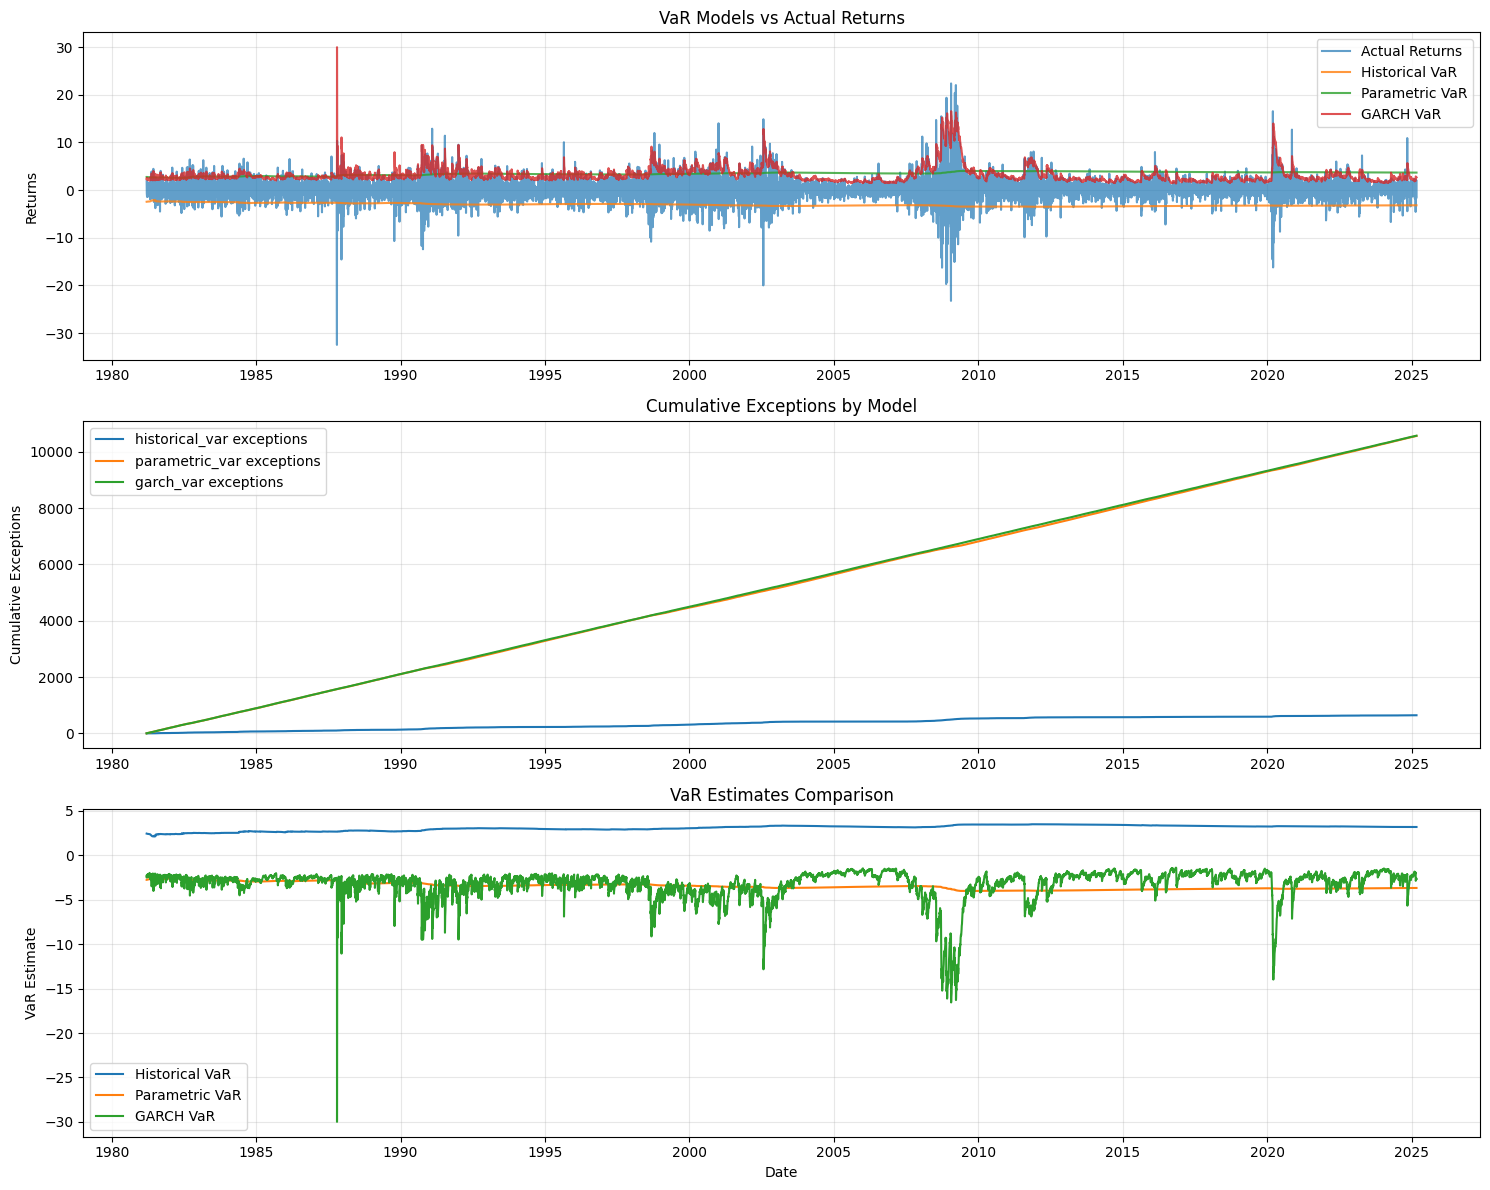


VaR Models Performance Metrics:
                Exception Rate  Target Exception Rate  Average VaR  \
historical_var        0.058032                   0.05     3.068362   
parametric_var        0.953520                   0.05    -3.485056   
garch_var             0.954332                   0.05    -3.239659   

                VaR Efficiency (Std)  Number of Exceptions  Total Observations  
historical_var              0.297240                 643.0             11080.0  
parametric_var              0.363749               10565.0             11080.0  
garch_var                   1.764313               10574.0             11080.0  


In [ ]:
def plot_var_comparison(backtest_results, var_series):
    """Plot VaR models comparison"""

    plt.figure(figsize=(15, 12))

    # Plot 1: VaR vs Actual Returns
    plt.subplot(3, 1, 1)
    plt.plot(var_series.index, var_series['returns'], label='Actual Returns', alpha=0.7)
    plt.plot(var_series.index, -var_series['historical_var'], label='Historical VaR', alpha=0.8)
    plt.plot(var_series.index, -var_series['parametric_var'], label='Parametric VaR', alpha=0.8)
    plt.plot(var_series.index, -var_series['garch_var'], label='GARCH VaR', alpha=0.8)
    plt.title('VaR Models vs Actual Returns')
    plt.ylabel('Returns')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Exceptions over time
    plt.subplot(3, 1, 2)
    for model in ['historical_var', 'parametric_var', 'garch_var']:
        exceptions = var_series['returns'] < -var_series[model]
        plt.plot(var_series.index, exceptions.cumsum(), label=f'{model} exceptions')
    plt.title('Cumulative Exceptions by Model')
    plt.ylabel('Cumulative Exceptions')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 3: VaR estimates comparison
    plt.subplot(3, 1, 3)
    plt.plot(var_series.index, var_series['historical_var'], label='Historical VaR')
    plt.plot(var_series.index, var_series['parametric_var'], label='Parametric VaR')
    plt.plot(var_series.index, var_series['garch_var'], label='GARCH VaR')
    plt.title('VaR Estimates Comparison')
    plt.ylabel('VaR Estimate')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Plot results
plot_var_comparison(backtest_historical, var_series)

# Performance metrics table
def calculate_var_metrics(var_series):
    """Calculate performance metrics for VaR models"""

    metrics = {}

    for model in ['historical_var', 'parametric_var', 'garch_var']:
        var_values = var_series[model].dropna()
        returns_aligned = var_series['returns'].loc[var_values.index]

        # Calculate metrics
        exceptions = returns_aligned < -var_values
        exception_rate = exceptions.mean()

        # Average VaR
        avg_var = var_values.mean()

        # VaR efficiency (lower is better)
        var_efficiency = var_values.std()

        metrics[model] = {
            'Exception Rate': exception_rate,
            'Target Exception Rate': 0.05,
            'Average VaR': avg_var,
            'VaR Efficiency (Std)': var_efficiency,
            'Number of Exceptions': exceptions.sum(),
            'Total Observations': len(returns_aligned)
        }

    return pd.DataFrame(metrics).T

# Display metrics
metrics_df = calculate_var_metrics(var_series)
print("\nVaR Models Performance Metrics:")
print("=" * 50)
print(metrics_df.round(6))

In [ ]:
def compare_garch_models(returns):
    """Compare different GARCH model specifications"""

    models = {}

    # GARCH(1,1) with normal distribution
    print("Fitting GARCH(1,1) Normal...")
    model_normal = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
    fit_normal = model_normal.fit(disp='off')
    models['GARCH(1,1)-Normal'] = fit_normal

    # GARCH(1,1) with t-distribution
    print("Fitting GARCH(1,1) t-distribution...")
    model_t = arch_model(returns, vol='Garch', p=1, q=1, dist='t')
    fit_t = model_t.fit(disp='off')
    models['GARCH(1,1)-t'] = fit_t

    # GJR-GARCH (accounts for leverage effects)
    print("Fitting GJR-GARCH...")
    model_gjr = arch_model(returns, vol='GARCH', p=1, q=1, o=1, dist='t')
    fit_gjr = model_gjr.fit(disp='off')
    models['GJR-GARCH'] = fit_gjr

    # Compare model criteria
    comparison = pd.DataFrame({
        'AIC': [fit.aic for fit in models.values()],
        'BIC': [fit.bic for fit in models.values()],
        'Log-Likelihood': [fit.loglikelihood for fit in models.values()]
    }, index=models.keys())

    print("\nModel Comparison:")
    print("=" * 40)
    print(comparison.round(2))

    return models, comparison

# Compare different GARCH specifications
garch_models, model_comparison = compare_garch_models(df['log_returns'].dropna())

# Select best model based on AIC
best_model_name = model_comparison['AIC'].idxmin()
best_model = garch_models[best_model_name]
print(f"\nBest model: {best_model_name}")

Fitting GARCH(1,1) Normal...
Fitting GARCH(1,1) t-distribution...
Fitting GJR-GARCH...

Model Comparison:
                        AIC       BIC  Log-Likelihood
GARCH(1,1)-Normal  45471.63  45500.97       -22731.81
GARCH(1,1)-t       44559.69  44596.36       -22274.84
GJR-GARCH          44465.67  44509.68       -22226.83

Best model: GJR-GARCH


# GARCH model - improved

In [16]:
import pandas as pd
import numpy as np
from arch import arch_model


In [17]:
df.shape[0]

11333

In [18]:
df.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'returns',
       'log_returns', 'price_range', 'price_gap', 'volatility_5',
       'realized_vol_5', 'volatility_10', 'realized_vol_10', 'volatility_20',
       'realized_vol_20', 'volatility_50', 'realized_vol_50', 'sma_5', 'ema_5',
       'sma_10', 'ema_10', 'sma_20', 'ema_20', 'sma_50', 'ema_50', 'rsi_14',
       'rsi_21', 'macd', 'macd_signal', 'bb_upper_20', 'bb_lower_20',
       'bb_position_20', 'bb_upper_50', 'bb_lower_50', 'bb_position_50',
       'volume_sma_20', 'volume_ratio', 'return_lag_1', 'return_lag_2',
       'return_lag_3', 'return_lag_5', 'return_lag_10', 'rolling_var_95_22',
       'rolling_cvar_95_22', 'rolling_var_95_66', 'rolling_cvar_95_66',
       'rolling_var_95_252', 'rolling_cvar_95_252'],
      dtype='object')

### just a simulation

In [19]:
N = 11333 
np.random.seed(42)
mean_return = 0.0005
base_volatility = 0.015
shocks = np.random.normal(loc=0, scale=1, size=N)
volatility = np.zeros_like(shocks)
returns = np.zeros_like(shocks)
for i in range(1, N):
    volatility[i] = 0.1 * base_volatility + 0.8 * volatility[i-1] + 0.1 * shocks[i-1]**2
    returns[i] = mean_return + np.sqrt(volatility[i]) * shocks[i]

df = pd.DataFrame({
    'date': pd.date_range(start='2020-01-01', periods=N, freq='B'),
    'log_returns': returns
}).set_index('date')
df.head()

log_returns
date                   
2020-01-01     0.000000
2020-01-02    -0.021868
2020-01-03     0.101568
2020-01-06     0.382564
2020-01-07    -0.124242

In [24]:
df.shape

(11329, 3)

In [21]:
# Create the exogenous variables needed for the advanced model
df['return_lag_1'] = df['log_returns'].shift(1)
df['realized_vol_5'] = df['log_returns'].rolling(window=5).std()
df.head()

log_returns  return_lag_1  realized_vol_5
date                                                 
2020-01-01     0.000000           NaN             NaN
2020-01-02    -0.021868      0.000000             NaN
2020-01-03     0.101568     -0.021868             NaN
2020-01-06     0.382564      0.101568             NaN
2020-01-07    -0.124242      0.382564        0.193477

In [22]:
# Drop NaNs that result from the shift and rolling window calculations
df.dropna(inplace=True) 

In [23]:
df.head()

log_returns  return_lag_1  realized_vol_5
date                                                 
2020-01-07    -0.124242      0.382564        0.193477
2020-01-08    -0.112767     -0.124242        0.209257
2020-01-09     0.696437     -0.112767        0.350638
2020-01-10     0.489648      0.696437        0.368997
2020-01-13    -0.290952      0.489648        0.433290

In [25]:
# Exogenous variables for the MEAN equation (mu)
# In finance, this creates an AR(1) model for returns.
x_mean = df['return_lag_1'] 

# Exogenous variables for the VARIANCE equation (omega, alpha, beta)
# This allows realized volatility to influence the predicted GARCH volatility.
x_vol = df['realized_vol_5'] 

In [26]:
# Model Specification:
# mean='ARX': Specifies an AutoRegressive model (AR) with eXogenous regressors (X) for the mean.
# vol='Garch' or 'GJR-GARCH': We use GJR-GARCH to model asymmetric volatility.
model = arch_model(
    df['log_returns'] * 100, # GARCH works better with scaled returns (e.g., in percent)
    mean='ARX',
    lags=1,                   # AR(1) term for the mean
    x=x_mean,                 # The exogenous variable for the mean equation (return_lag_1)
    vol='Garch',
    p=1,
    o=1,                      # 'o' parameter is needed for GJR-GARCH (the asymmetry term)
    q=1,
    power=2.0,                # Use 2.0 for standard variance GARCH (instead of volatility GARCH)
    # The `GJR-GARCH` is achieved by setting `vol='Garch'` and `o=1`.
    # To include the realized_vol_5, we use the custom_var option:
    volatility_process='GJR-GARCH', 
    dist='t',
    rescale=True              # Automatically rescale data for better convergence
)

TypeError: arch_model() got an unexpected keyword argument 'volatility_process'

# LSTM Deep Learning Model

In [ ]:
df.head()

open      high       low     close  adj_close  volume   returns  \
date                                                                          
1980-03-18   0.0  5.111111  5.037037  5.074074   1.067288   64125  0.735291   
1980-03-19   0.0  5.166667  5.111111  5.148148   1.082870   40500  1.459858   
1980-03-20   0.0  5.148148  5.092593  5.111111   1.075079   18900 -0.719422   
1980-03-21   0.0  5.222222  5.111111  5.222222   1.098450   97200  2.173905   
1980-03-24   0.0  5.185185  5.092593  5.092593   1.071184   90450 -2.482251   

            log_returns  rolling_mean  rolling_std  price_range  price_gap  \
date                                                                         
1980-03-18     0.732601           NaN          NaN     1.459858        NaN   
1980-03-19     1.449305           NaN          NaN     1.079142     -100.0   
1980-03-20    -0.722022           NaN          NaN     1.086943     -100.0   
1980-03-21     2.150612           NaN          NaN     2.127652     -100.0   
1980-03-24    -2.513578           NaN          NaN     1.818165     -100.0   

            volatility_5  realized_vol_5  volatility_10  realized_vol_10  \
date                                                                       
1980-03-18           NaN             NaN            NaN              NaN   
1980-03-19           NaN             NaN            NaN              NaN   
1980-03-20           NaN             NaN            NaN              NaN   
1980-03-21           NaN             NaN            NaN              NaN   
1980-03-24      1.857706       44.692576            NaN              NaN   

            volatility_20  realized_vol_20  volatility_50  realized_vol_50  \
date                                                                         
1980-03-18            NaN              NaN            NaN              NaN   
1980-03-19            NaN              NaN            NaN              NaN   
1980-03-20            NaN              NaN            NaN              NaN   
1980-03-21            NaN              NaN            NaN              NaN   
1980-03-24            NaN              NaN            NaN              NaN   

              sma_5     ema_5  sma_10    ema_10  sma_20    ema_20  sma_50  \
date                                                                        
1980-03-18      NaN  5.074074     NaN  5.074074     NaN  5.074074     NaN   
1980-03-19      NaN  5.118518     NaN  5.114815     NaN  5.112963     NaN   
1980-03-20      NaN  5.115010     NaN  5.113326     NaN  5.112283     NaN   
1980-03-21      NaN  5.159544     NaN  5.149202     NaN  5.144021     NaN   
1980-03-24  5.12963  5.133842     NaN  5.132951     NaN  5.131581     NaN   

              ema_50  rsi_14  rsi_21      macd  macd_signal  bb_upper_20  \
date                                                                       
1980-03-18  5.074074     NaN     NaN  0.000000     0.000000          NaN   
1980-03-19  5.111852     NaN     NaN  0.001662     0.000923          NaN   
1980-03-20  5.111595     NaN     NaN  0.000969     0.000942          NaN   
1980-03-21  5.140933     NaN     NaN  0.004642     0.002195          NaN   
1980-03-24  5.130476     NaN     NaN  0.001382     0.001953          NaN   

            bb_lower_20  bb_position_20  bb_upper_50  bb_lower_50  \
date                                                                
1980-03-18          NaN             NaN          NaN          NaN   
1980-03-19          NaN             NaN          NaN          NaN   
1980-03-20          NaN             NaN          NaN          NaN   
1980-03-21          NaN             NaN          NaN          NaN   
1980-03-24          NaN             NaN          NaN          NaN   

            bb_position_50  volume_sma_20  volume_ratio  return_lag_1  \
date                                                                    
1980-03-18             NaN            NaN           NaN           NaN   
1980-03-19             NaN            NaN           NaN

In [ ]:
df.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'returns',
       'log_returns', 'rolling_mean', 'rolling_std', 'price_range',
       'price_gap', 'volatility_5', 'realized_vol_5', 'volatility_10',
       'realized_vol_10', 'volatility_20', 'realized_vol_20', 'volatility_50',
       'realized_vol_50', 'sma_5', 'ema_5', 'sma_10', 'ema_10', 'sma_20',
       'ema_20', 'sma_50', 'ema_50', 'rsi_14', 'rsi_21', 'macd', 'macd_signal',
       'bb_upper_20', 'bb_lower_20', 'bb_position_20', 'bb_upper_50',
       'bb_lower_50', 'bb_position_50', 'volume_sma_20', 'volume_ratio',
       'return_lag_1', 'return_lag_2', 'return_lag_3', 'return_lag_5',
       'return_lag_10', 'rolling_var_95_22', 'rolling_cvar_95_22',
       'rolling_var_95_66', 'rolling_cvar_95_66', 'rolling_var_95_252',
       'rolling_cvar_95_252'],
      dtype='object')

In [ ]:
class RiskLSTMModel:
    """LSTM model for volatility forecasting and VaR prediction"""

    def __init__(self, lookback=60, units=50, dropout=0.2):
        self.lookback = lookback
        self.units = units
        self.dropout = dropout
        self.scaler = StandardScaler()
        self.model = None

    def prepare_data(self, data, feature_columns, target_column, train_size=0.8):
        """Prepare data for LSTM training"""

        # Select features and target
        X = data[feature_columns].values
        y = data[target_column].values

        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        # Create sequences
        X_seq, y_seq = [], []
        for i in range(self.lookback, len(X_scaled)):
            X_seq.append(X_scaled[i-self.lookback:i])
            y_seq.append(y[i])

        X_seq, y_seq = np.array(X_seq), np.array(y_seq)

        # Split data
        split_idx = int(len(X_seq) * train_size)
        X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
        y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

        return X_train, X_test, y_train, y_test

    def build_model(self, input_shape):
        """Build LSTM model architecture"""

        model = Sequential([
            Bidirectional(LSTM(self.units, return_sequences=True), input_shape=input_shape),
            Dropout(self.dropout),
            Bidirectional(LSTM(self.units, return_sequences=True)),
            Dropout(self.dropout),
            Bidirectional(LSTM(self.units)),
            Dropout(self.dropout),
            Dense(32, activation='relu'),
            Dropout(self.dropout),
            Dense(16, activation='relu'),
            Dense(1)  # Output: predicted return
        ])

        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )

        return model

    def train(self, X_train, y_train, X_test, y_test, epochs=100, batch_size=32):
        """Train the LSTM model"""

        self.model = self.build_model((X_train.shape[1], X_train.shape[2]))

        history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test),
            verbose=1,
            shuffle=False
        )

        return history

    def predict_returns(self, X):
        """Predict returns using trained model"""
        return self.model.predict(X).flatten()

    def estimate_var(self, predictions, confidence_level=0.95):
        """Estimate VaR from predicted returns"""
        return np.percentile(predictions, (1 - confidence_level) * 100)

# Prepare features for LSTM
# feature_columns = [
#     'returns', 'volatility_20', 'realized_vol_20', 'rsi_14',
#     'macd', 'bb_position_20', 'volume_ratio', 'price_range'
# ]

# # Remove rows with NaN values for LSTM training
# lstm_data = df[feature_columns + ['log_returns']].dropna()

# # Initialize and train LSTM model
# print("Training LSTM model...")
lstm_model = RiskLSTMModel(lookback=60, units=64, dropout=0.3)
X_train, X_test, y_train, y_test = lstm_model.prepare_data(
    lstm_data, feature_columns, 'log_returns', train_size=0.8
)

# Train the model

# history = lstm_model.train(X_train, y_train, X_test, y_test, epochs=50, batch_size=32)

# # Make predictions
# lstm_predictions = lstm_model.predict_returns(X_test)
# lstm_var = lstm_model.estimate_var(lstm_predictions)

KeyError: "['macd', 'price_range', 'realized_vol_20', 'volatility_20', 'volume_ratio'] not in index"

In [ ]:
lstm_model = joblib.load('/content/drive/My Drive/Colab Notebooks/TimeSeries_MarketRiskModel_VAR/lstm_model.pkl')

In [ ]:
lstm_predictions0 = lstm_model.predict_returns(X_test)
lstm_predictions0

ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 11 and 8 for '{{node sequential_1/bidirectional_1/forward_lstm_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_1/bidirectional_1/forward_lstm_1/strided_slice_1, sequential_1/bidirectional_1/forward_lstm_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [32,11], [8,256].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(32, 11), dtype=float32)
  • states=('tf.Tensor(shape=(32, 64), dtype=float32)', 'tf.Tensor(shape=(32, 64), dtype=float32)')
  • training=False

In [ ]:
lstm_var = lstm_model.estimate_var(lstm_predictions)
lstm_var

np.float32(-0.005938291)

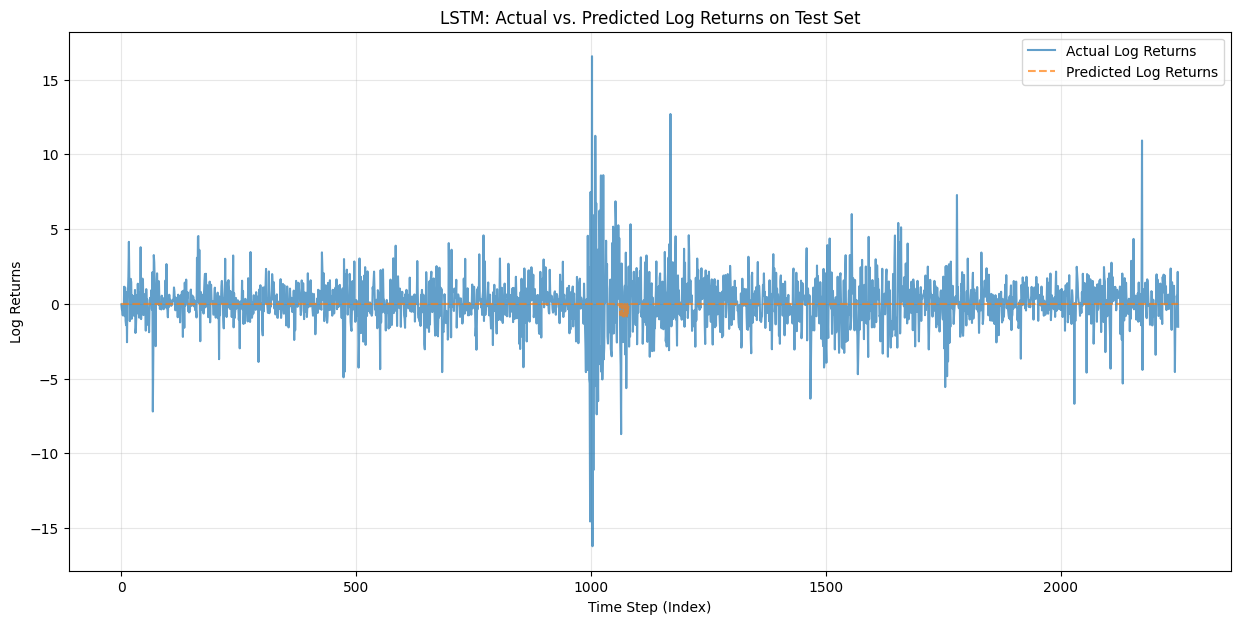

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure y_test and lstm_predictions are aligned for comparison
# Inferred from previous steps that lstm_predictions is already for X_test

# 1. Plot Actual vs. Predicted Returns
plt.figure(figsize=(15, 7))
plt.plot(y_test, label='Actual Log Returns', alpha=0.7)
plt.plot(lstm_predictions, label='Predicted Log Returns', alpha=0.7, linestyle='--')
plt.title('LSTM: Actual vs. Predicted Log Returns on Test Set')
plt.xlabel('Time Step (Index)')
plt.ylabel('Log Returns')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

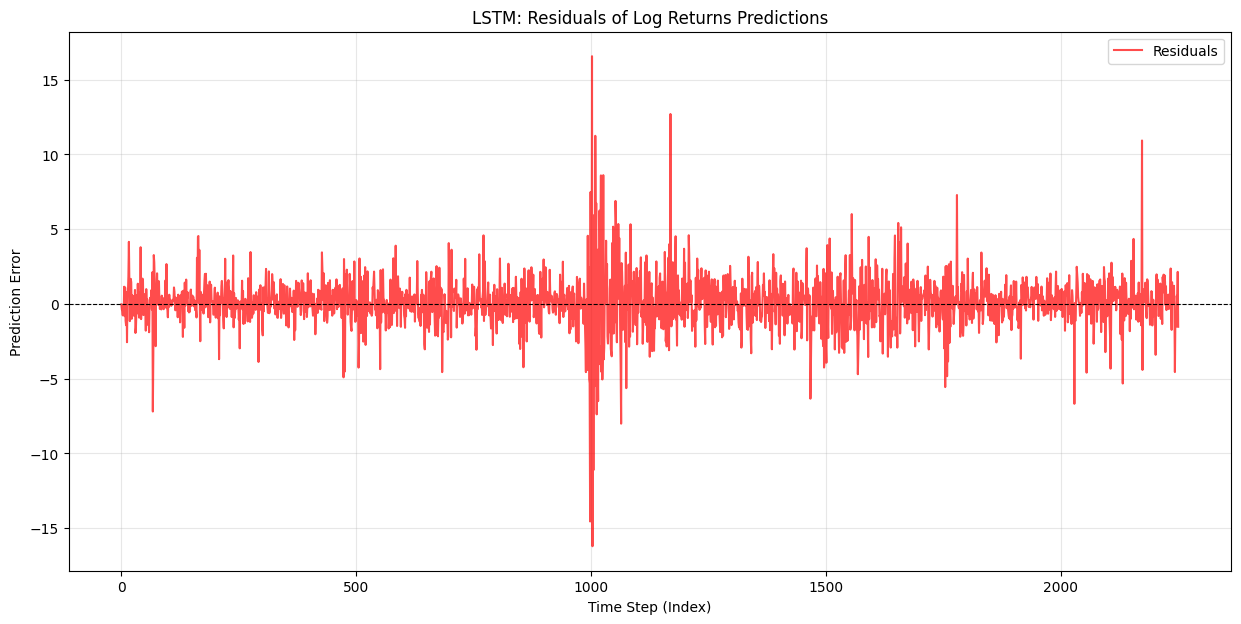

In [ ]:
# 2. Plot Residuals (Prediction Errors)
residuals = y_test - lstm_predictions

plt.figure(figsize=(15, 7))
plt.plot(residuals, label='Residuals', alpha=0.7, color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('LSTM: Residuals of Log Returns Predictions')
plt.xlabel('Time Step (Index)')
plt.ylabel('Prediction Error')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

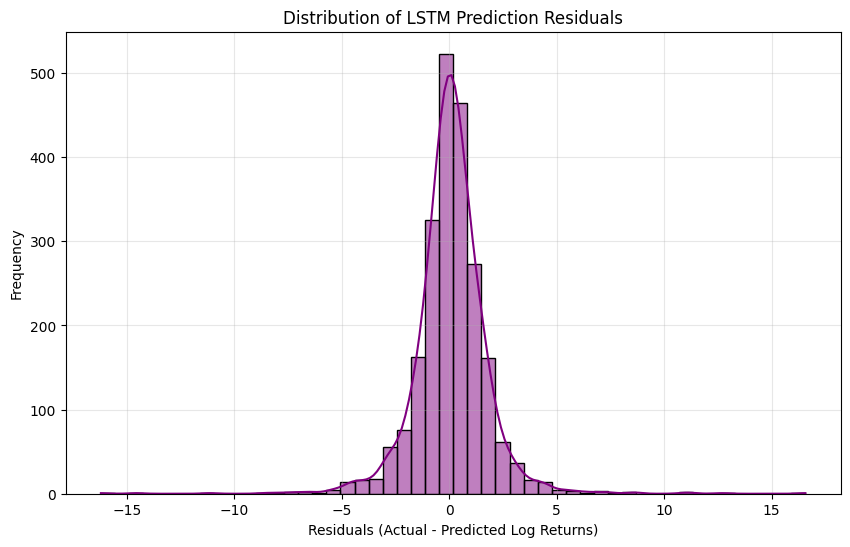

In [ ]:
# 3. Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.title('Distribution of LSTM Prediction Residuals')
plt.xlabel('Residuals (Actual - Predicted Log Returns)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

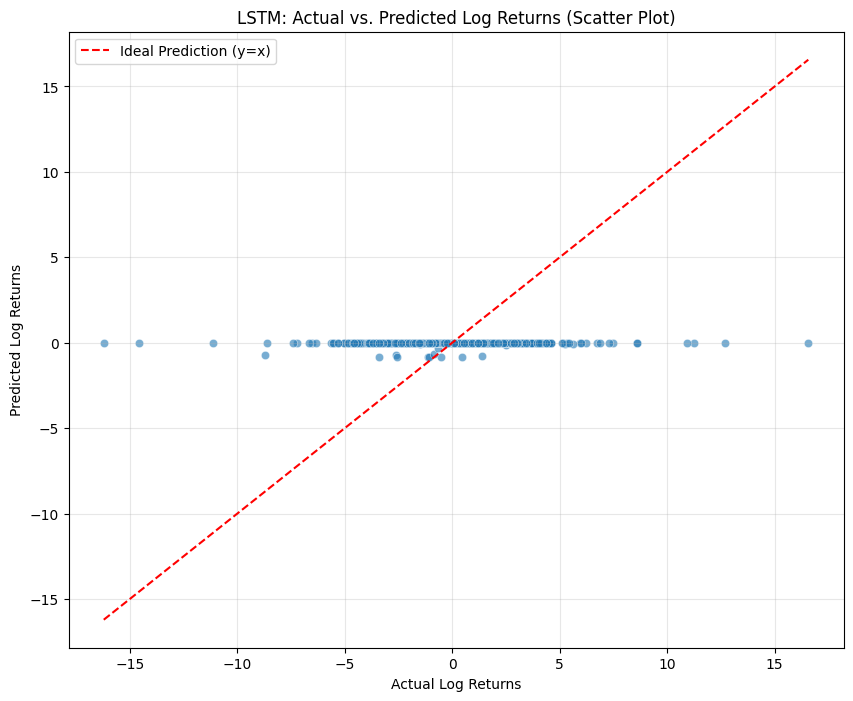

In [ ]:
# 4. Scatter Plot of Actual vs. Predicted
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=lstm_predictions, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Prediction (y=x)')
plt.title('LSTM: Actual vs. Predicted Log Returns (Scatter Plot)')
plt.xlabel('Actual Log Returns')
plt.ylabel('Predicted Log Returns')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# import joblib
# joblib.dump(lstm_model,'/content/drive/My Drive/Colab Notebooks/TimeSeries_MarketRiskModel_VAR/lstm_model.pkl')

In [ ]:
df.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'returns',
       'log_returns', 'rolling_mean', 'rolling_std', 'price_range',
       'price_gap', 'volatility_5', 'realized_vol_5', 'volatility_10',
       'realized_vol_10', 'volatility_20', 'realized_vol_20', 'volatility_50',
       'realized_vol_50', 'sma_5', 'ema_5', 'sma_10', 'ema_10', 'sma_20',
       'ema_20', 'sma_50', 'ema_50', 'rsi_14', 'rsi_21', 'macd', 'macd_signal',
       'bb_upper_20', 'bb_lower_20', 'bb_position_20', 'bb_upper_50',
       'bb_lower_50', 'bb_position_50', 'volume_sma_20', 'volume_ratio',
       'return_lag_1', 'return_lag_2', 'return_lag_3', 'return_lag_5',
       'return_lag_10', 'rolling_var_95_22', 'rolling_cvar_95_22',
       'rolling_var_95_66', 'rolling_cvar_95_66', 'rolling_var_95_252',
       'rolling_cvar_95_252'],
      dtype='object')

In [ ]:
high_corr_features.index
features = high_corr_features.index
features.sort_values(ascending=True)
features

Index(['returns', 'log_returns', 'bb_position_20', 'bb_position_50', 'rsi_14',
       'rsi_21', 'realized_vol_5', 'volatility_5', 'realized_vol_10',
       'rolling_mean', 'volatility_10'],
      dtype='object')

In [ ]:
feature_columns.sort()
feature_columns

['bb_position_20',
 'macd',
 'price_range',
 'realized_vol_20',
 'returns',
 'rsi_14',
 'volatility_20',
 'volume_ratio']

In [ ]:
len(feature_columns),len(high_corr_features)

(8, 11)

In [ ]:
# Remove rows with NaN values for LSTM training
lstm_data1 = df[features]

lstm_data1.head()


returns  log_returns  bb_position_20  bb_position_50  rsi_14  \
date                                                                        
1980-03-18  0.735291     0.732601             NaN             NaN     NaN   
1980-03-19  1.459858     1.449305             NaN             NaN     NaN   
1980-03-20 -0.719422    -0.722022             NaN             NaN     NaN   
1980-03-21  2.173905     2.150612             NaN             NaN     NaN   
1980-03-24 -2.482251    -2.513578             NaN             NaN     NaN   

            rsi_21  realized_vol_5  volatility_5  realized_vol_10  \
date                                                                
1980-03-18     NaN             NaN           NaN              NaN   
1980-03-19     NaN             NaN           NaN              NaN   
1980-03-20     NaN             NaN           NaN              NaN   
1980-03-21     NaN             NaN           NaN              NaN   
1980-03-24     NaN       44.692576      1.857706              NaN   

            rolling_mean  volatility_10  
date                                     
1980-03-18           NaN            NaN  
1980-03-19           NaN            NaN  
1980-03-20           NaN            NaN  
1980-03-21           NaN            NaN  
1980-03-24           NaN            NaN

In [ ]:
lstm_data1.isna().sum()[lstm_data1.isna().sum() > 0]

bb_position_20      19
bb_position_50      49
rsi_14              13
rsi_21              20
realized_vol_5       4
volatility_5         4
realized_vol_10      9
rolling_mean       251
volatility_10        9
dtype: int64

In [ ]:
lstm_data1 = lstm_data1[features].bfill()
lstm_data1

returns  log_returns  bb_position_20  bb_position_50     rsi_14  \
date                                                                           
1980-03-18  0.735291     0.732601        0.217870        0.770157  70.491819   
1980-03-19  1.459858     1.449305        0.217870        0.770157  70.491819   
1980-03-20 -0.719422    -0.722022        0.217870        0.770157  70.491819   
1980-03-21  2.173905     2.150612        0.217870        0.770157  70.491819   
1980-03-24 -2.482251    -2.513578        0.217870        0.770157  70.491819   
...              ...          ...             ...             ...        ...   
2025-02-25 -1.507616    -1.519096       -1.064996        0.054421  38.612782   
2025-02-26  0.540021     0.538568       -0.848934        0.091330  37.118218   
2025-02-27  0.100460     0.100409       -0.754789        0.089151  27.097760   
2025-02-28  2.161747     2.138713       -0.342307        0.265564  37.175071   
2025-03-03 -1.522765    -1.534479       -0.579236        0.114231  37.810004   

               rsi_21  realized_vol_5  volatility_5  realized_vol_10  \
date                                                                   
1980-03-18  60.674172       44.692576      1.857706        39.972355   
1980-03-19  60.674172       44.692576      1.857706        39.972355   
1980-03-20  60.674172       44.692576      1.857706        39.972355   
1980-03-21  60.674172       44.692576      1.857706        39.972355   
1980-03-24  60.674172       44.692576      1.857706        39.972355   
...               ...             ...           ...              ...   
2025-02-25  43.025881       77.269762      1.631643        44.566989   
2025-02-26  43.428904       77.997127      1.828101        41.658423   
2025-02-27  42.323005       14.921308      0.864531        41.630019   
2025-02-28  48.328433       26.835043      1.452969        48.890056   
2025-03-03  43.669927       30.372968      1.545653        52.555905   

            rolling_mean  volatility_10  
date                                     
1980-03-18      0.186855       1.648884  
1980-03-19      0.186855       1.648884  
1980-03-20      0.186855       1.648884  
1980-03-21      0.186855       1.648884  
1980-03-24      0.186855       1.648884  
...                  ...            ...  
2025-02-25      0.146829       1.685047  
2025-02-26      0.146978       1.588748  
2025-02-27      0.148735       1.585328  
2025-02-28      0.157119       1.797180  
2025-03-03      0.149065       1.818659  

[11332 rows x 11 columns]

In [ ]:
lstm_data1.isna().sum()[lstm_data1.isna().sum() > 0]

Series([], dtype: int64)

In [ ]:
# Initialize and train LSTM model
lstm_model1 = RiskLSTMModel(lookback=60, units=64, dropout=0.3)
X_train, X_test, y_train, y_test = lstm_model1.prepare_data(
    lstm_data1, features, 'log_returns', train_size=0.8
)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9017, 60, 11), (2255, 60, 11), (9017,), (2255,))

In [ ]:
y_train
X_train

array([[[ 0.304278  ,  0.31467307,  0.22165594, ..., -0.2280007 ,
          1.13933064, -0.14850165],
        [ 0.63048046,  0.63788111,  0.22165594, ..., -0.2280007 ,
          1.13933064, -0.14850165],
        [-0.35063899, -0.34131095,  0.22165594, ..., -0.2280007 ,
          1.13933064, -0.14850165],
        ...,
        [-2.17057463, -2.21596457,  0.51984357, ...,  0.10261126,
          1.13933064,  0.5830958 ],
        [ 0.67669119,  0.6834809 ,  1.00927052, ...,  0.1171245 ,
          1.13933064,  0.58522374],
        [ 0.8043926 ,  0.80925474,  1.43125401, ...,  0.12519531,
          1.13933064,  0.59610436]],

       [[ 0.63048046,  0.63788111,  0.22165594, ..., -0.2280007 ,
          1.13933064, -0.14850165],
        [-0.35063899, -0.34131095,  0.22165594, ..., -0.2280007 ,
          1.13933064, -0.14850165],
        [ 0.95194687,  0.9541463 ,  0.22165594, ..., -0.2280007 ,
          1.13933064, -0.14850165],
        ...,
        [ 0.67669119,  0.6834809 ,  1.00927052, ...,  

In [ ]:
# Train the model

history = lstm_model1.train(X_train, y_train, X_test, y_test, epochs=50, batch_size=32)

# Make predictions
lstm_predictions = lstm_model1.predict_returns(X_test)
lstm_var = lstm_model1.estimate_var(lstm_predictions)

Epoch 1/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 80s 245ms/step - loss: 4.2734 - mae: 1.4327 - val_loss: 3.0063 - val_mae: 1.1381
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 79s 234ms/step - loss: 4.2438 - mae: 1.4243 - val_loss: 3.0049 - val_mae: 1.1377
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 65s 229ms/step - loss: 4.2391 - mae: 1.4245 - val_loss: 3.0071 - val_mae: 1.1391
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 64s 227ms/step - loss: 4.2412 - mae: 1.4232 - val_loss: 3.0067 - val_mae: 1.1383
Epoch 5/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 83s 232ms/step - loss: 4.2383 - mae: 1.4230 - val_loss: 3.0074 - val_mae: 1.1394
Epoch 6/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 80s 223ms/step - loss: 4.2417 - mae: 1.4250 - val_loss: 3.0034 - val_mae: 1.1360
Epoch 7/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 81s 220ms/step - loss: 4.2392 - mae: 1.4243 - val_loss: 3.0033 - val_mae: 1.1369
Epoch 8/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 64s 227ms/step - loss: 4.2380 - mae: 1.4239 - val_loss: 3.0042 - val_mae: 1.1373
Epoch 9/50
282/282 ━━━━━━━━━━━━━

In [ ]:
lstm_predictions = lstm_model1.predict_returns(X_test)
print(lstm_predictions)
lstm_var = lstm_model1.estimate_var(lstm_predictions)
print(lstm_var)

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step
[0.00908843 0.00908843 0.00908843 ... 0.00856873 0.00859495 0.00834326]
0.008429014


In [ ]:
def evaluate_lstm_performance(y_true, y_pred, var_estimate):
    """Comprehensive LSTM model evaluation"""

    print("LSTM MODEL PERFORMANCE DIAGNOSTICS")
    print("=" * 50)

    # Basic regression metrics
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"MAE: {mae:.6f}")
    print(f"MSE: {mse:.6f}")
    print(f"RMSE: {rmse:.6f}")
    print(f"R² Score: {r2:.6f}")

    # Check if predictions are constant
    unique_predictions = np.unique(y_pred)
    print(f"Unique predictions: {len(unique_predictions)}")
    if len(unique_predictions) <= 5:
        print(f"⚠️  WARNING: Model is predicting only {len(unique_predictions)} unique values")
        print(f"   Values: {unique_predictions}")

    # Direction accuracy
    direction_true = np.sign(y_true[1:] - y_true[:-1])
    direction_pred = np.sign(y_pred[1:] - y_pred[:-1])
    direction_accuracy = np.mean(direction_true == direction_pred)
    print(f"Direction Accuracy: {direction_accuracy:.4f}")

    # VaR backtesting
    exceptions = y_true < var_estimate
    exception_rate = np.mean(exceptions)
    print(f"VaR Exception Rate: {exception_rate:.4f} (Target: 0.05)")

    return {
        'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2,
        'direction_accuracy': direction_accuracy,
        'exception_rate': exception_rate,
        'is_constant': len(unique_predictions) == 1
    }

# Evaluate current model
metrics = evaluate_lstm_performance(y_test, lstm_predictions, lstm_var)


LSTM MODEL PERFORMANCE DIAGNOSTICS
MAE: 1.138236
MSE: 3.006880
RMSE: 1.734036
R² Score: -0.001075
Unique predictions: 1280
Direction Accuracy: 0.3483
VaR Exception Rate: 0.4820 (Target: 0.05)


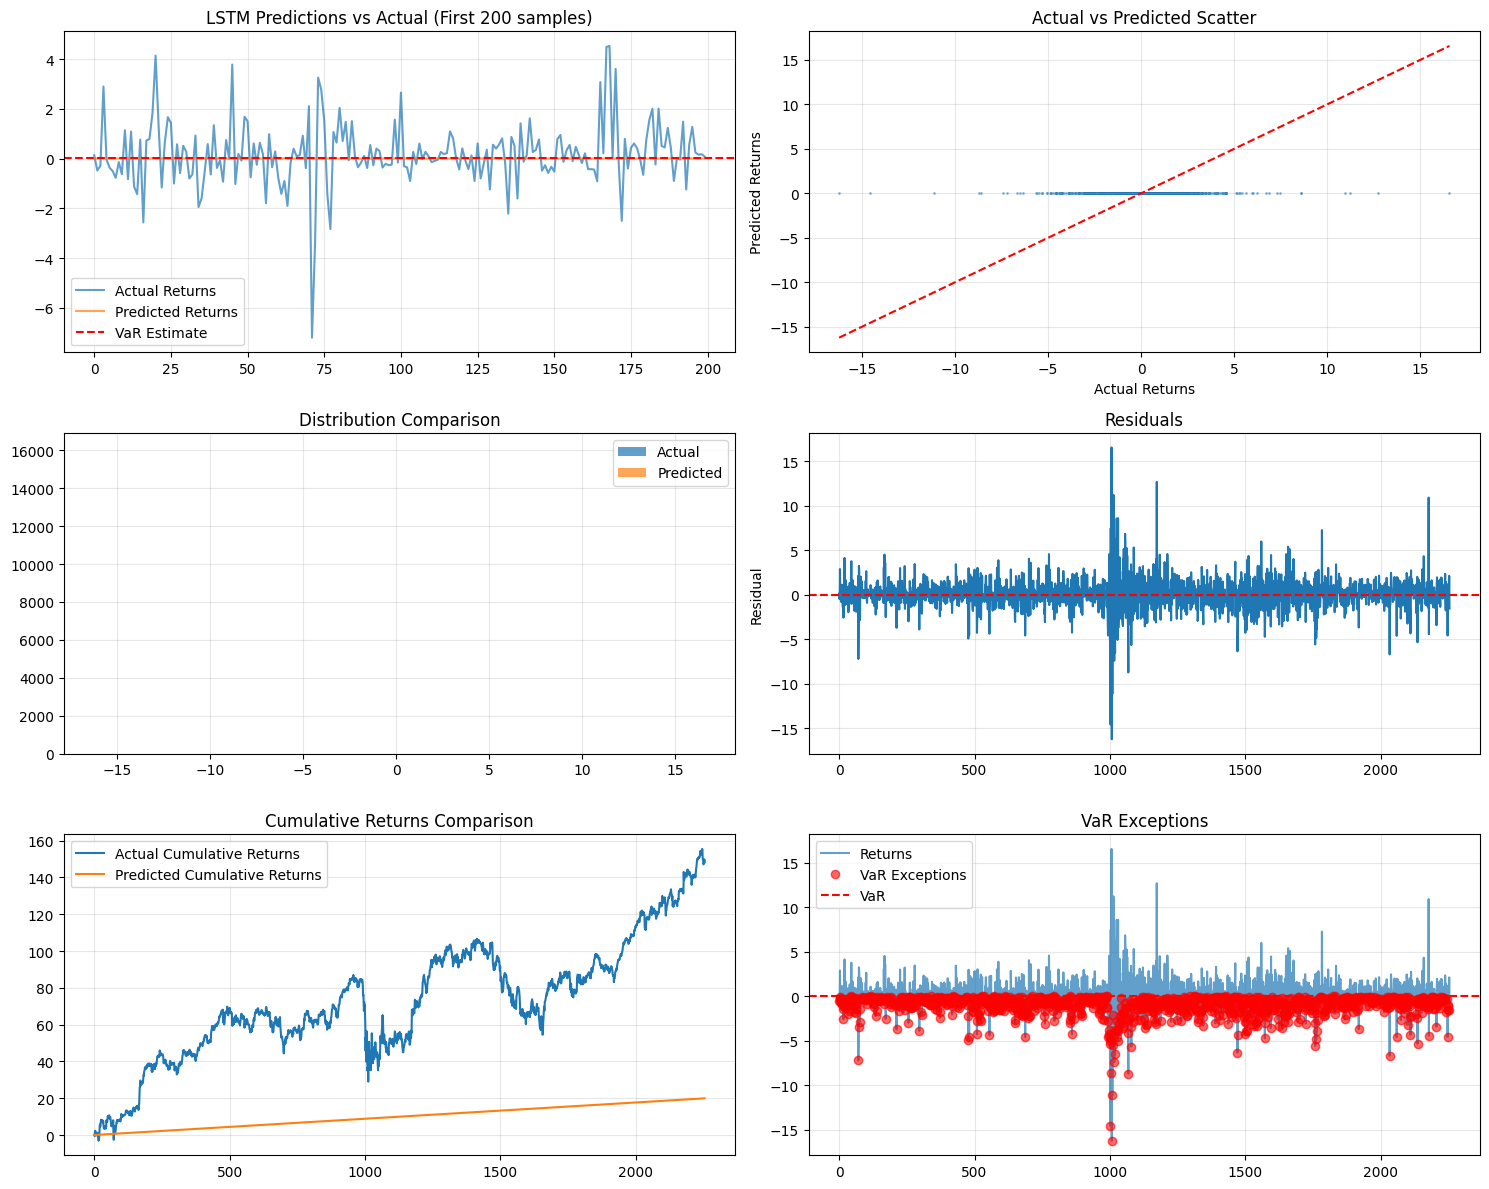

In [ ]:
def plot_lstm_diagnostics(y_true, y_pred, var_estimate):
    """Plot comprehensive diagnostics"""

    plt.figure(figsize=(15, 12))

    # Plot 1: Predictions vs Actual
    plt.subplot(3, 2, 1)
    plt.plot(y_true[:200], label='Actual Returns', alpha=0.7)
    plt.plot(y_pred[:200], label='Predicted Returns', alpha=0.7)
    plt.axhline(y=var_estimate, color='red', linestyle='--', label='VaR Estimate')
    plt.title('LSTM Predictions vs Actual (First 200 samples)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Scatter plot
    plt.subplot(3, 2, 2)
    plt.scatter(y_true, y_pred, alpha=0.5, s=1)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual Returns')
    plt.ylabel('Predicted Returns')
    plt.title('Actual vs Predicted Scatter')
    plt.grid(True, alpha=0.3)

    # Plot 3: Distribution comparison
    plt.subplot(3, 2, 3)
    plt.hist(y_true, bins=50, alpha=0.7, label='Actual', density=True)
    plt.hist(y_pred, bins=50, alpha=0.7, label='Predicted', density=True)
    plt.legend()
    plt.title('Distribution Comparison')
    plt.grid(True, alpha=0.3)

    # Plot 4: Residuals
    plt.subplot(3, 2, 4)
    residuals = y_true - y_pred
    plt.plot(residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals')
    plt.ylabel('Residual')
    plt.grid(True, alpha=0.3)

    # Plot 5: Cumulative returns
    plt.subplot(3, 2, 5)
    cumulative_actual = np.cumsum(y_true)
    cumulative_pred = np.cumsum(y_pred)
    plt.plot(cumulative_actual, label='Actual Cumulative Returns')
    plt.plot(cumulative_pred, label='Predicted Cumulative Returns')
    plt.legend()
    plt.title('Cumulative Returns Comparison')
    plt.grid(True, alpha=0.3)

    # Plot 6: VaR exceptions
    plt.subplot(3, 2, 6)
    exceptions = y_true < var_estimate
    plt.plot(y_true, label='Returns', alpha=0.7)
    plt.plot(np.where(exceptions, y_true, np.nan), 'ro', label='VaR Exceptions', alpha=0.6)
    plt.axhline(y=var_estimate, color='red', linestyle='--', label='VaR')
    plt.legend()
    plt.title('VaR Exceptions')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Plot diagnostics
plot_lstm_diagnostics(y_test, lstm_predictions, lstm_var)

epoch = 2000

In [ ]:
class RiskLSTMModel:
    """LSTM model for volatility forecasting and VaR prediction"""

    def __init__(self, lookback=60, units=50, dropout=0.2):
        self.lookback = lookback
        self.units = units
        self.dropout = dropout
        self.scaler = StandardScaler()
        self.model = None

    def prepare_data(self, data, feature_columns, target_column, train_size=0.8):
        """Prepare data for LSTM training"""

        # Select features and target
        X = data[feature_columns].values
        y = data[target_column].values

        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        # Create sequences
        X_seq, y_seq = [], []
        for i in range(self.lookback, len(X_scaled)):
            X_seq.append(X_scaled[i-self.lookback:i])
            y_seq.append(y[i])

        X_seq, y_seq = np.array(X_seq), np.array(y_seq)

        # Split data
        split_idx = int(len(X_seq) * train_size)
        X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
        y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

        return X_train, X_test, y_train, y_test

    def build_model(self, input_shape):
        """Build LSTM model architecture"""

        model = Sequential([
            Bidirectional(LSTM(self.units, return_sequences=True), input_shape=input_shape),
            Dropout(self.dropout),
            Bidirectional(LSTM(self.units, return_sequences=True)),
            Dropout(self.dropout),
            Bidirectional(LSTM(self.units)),
            Dropout(self.dropout),
            Dense(32, activation='relu'),
            Dropout(self.dropout),
            Dense(16, activation='relu'),
            Dense(1)  # Output: predicted return
        ])

        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )

        return model

    def train(self, X_train, y_train, X_test, y_test, epochs=100, batch_size=32):
        """Train the LSTM model"""

        self.model = self.build_model((X_train.shape[1], X_train.shape[2]))

        history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test),
            verbose=1,
            shuffle=False
        )

        return history

    def predict_returns(self, X):
        """Predict returns using trained model"""
        return self.model.predict(X).flatten()

    def estimate_var(self, predictions, confidence_level=0.95):
        """Estimate VaR from predicted returns"""
        return np.percentile(predictions, (1 - confidence_level) * 100)

# Prepare features for LSTM
# feature_columns = [
#     'returns', 'volatility_20', 'realized_vol_20', 'rsi_14',
#     'macd', 'bb_position_20', 'volume_ratio', 'price_range'
# ]

# # Remove rows with NaN values for LSTM training
# lstm_data = df[feature_columns + ['log_returns']].dropna()

# # Initialize and train LSTM model
# print("Training LSTM model...")
lstm_model = RiskLSTMModel(lookback=60, units=64, dropout=0.3)
X_train, X_test, y_train, y_test = lstm_model.prepare_data(
    lstm_data, feature_columns, 'log_returns', train_size=0.8
)

# Train the model

# history = lstm_model.train(X_train, y_train, X_test, y_test, epochs=50, batch_size=32)

# # Make predictions
# lstm_predictions = lstm_model.predict_returns(X_test)
# lstm_var = lstm_model.estimate_var(lstm_predictions)

In [ ]:
lstm_model2 = RiskLSTMModel(lookback=60, units=64, dropout=0.3)
X_train, X_test, y_train, y_test = lstm_model2.prepare_data(
    lstm_data1, features, 'log_returns', train_size=0.8
)

In [ ]:
history = lstm_model2.train(X_train, y_train, X_test, y_test, epochs=2000, batch_size=32)

# Make predictions
lstm_predictions = lstm_model1.predict_returns(X_test)
print(f"lstm_predictions : {lstm_predictions}")
lstm_var = lstm_model1.estimate_var(lstm_predictions)
print(f"lstm_var : {lstm_var}")

Epoch 1/2000
282/282 ━━━━━━━━━━━━━━━━━━━━ 83s 244ms/step - loss: 4.2614 - mae: 1.4304 - val_loss: 3.0041 - val_mae: 1.1386
Epoch 2/2000
282/282 ━━━━━━━━━━━━━━━━━━━━ 79s 233ms/step - loss: 4.2549 - mae: 1.4287 - val_loss: 3.0099 - val_mae: 1.1396
Epoch 3/2000
282/282 ━━━━━━━━━━━━━━━━━━━━ 82s 234ms/step - loss: 4.2467 - mae: 1.4269 - val_loss: 3.0083 - val_mae: 1.1384
Epoch 4/2000
282/282 ━━━━━━━━━━━━━━━━━━━━ 81s 233ms/step - loss: 4.2375 - mae: 1.4241 - val_loss: 3.0008 - val_mae: 1.1368
Epoch 5/2000
282/282 ━━━━━━━━━━━━━━━━━━━━ 68s 241ms/step - loss: 4.2426 - mae: 1.4248 - val_loss: 3.0061 - val_mae: 1.1381
Epoch 6/2000
282/282 ━━━━━━━━━━━━━━━━━━━━ 86s 256ms/step - loss: 4.2415 - mae: 1.4238 - val_loss: 3.0044 - val_mae: 1.1375
Epoch 7/2000
282/282 ━━━━━━━━━━━━━━━━━━━━ 66s 233ms/step - loss: 4.2373 - mae: 1.4240 - val_loss: 3.0069 - val_mae: 1.1386
Epoch 8/2000
282/282 ━━━━━━━━━━━━━━━━━━━━ 81s 228ms/step - loss: 4.2397 - mae: 1.4227 - val_loss: 3.0048 - val_mae: 1.1375
Epoch 9/2000
282

# improved LSTM model

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df = pd.read_csv('../datasets/feature/featured_jpmc_stocks.csv')
df.head()

open      high       low     close  adj_close  volume   returns  \
0   0.0  5.129630  5.018519  5.037037   1.059499   62775       NaN   
1   0.0  5.111111  5.037037  5.074074   1.067288   64125  0.735291   
2   0.0  5.166667  5.111111  5.148148   1.082870   40500  1.459858   
3   0.0  5.148148  5.092593  5.111111   1.075079   18900 -0.719422   
4   0.0  5.222222  5.111111  5.222222   1.098450   97200  2.173905   

   log_returns  price_range  price_gap  volatility_5  realized_vol_5  \
0          NaN     2.205883        NaN           NaN             NaN   
1     0.732601     1.459858     -100.0           NaN             NaN   
2     1.449305     1.079142     -100.0           NaN             NaN   
3    -0.722022     1.086943     -100.0           NaN             NaN   
4     2.150612     2.127652     -100.0           NaN             NaN   

   volatility_10  realized_vol_10  volatility_20  realized_vol_20  \
0            NaN              NaN            NaN              NaN   
1            NaN              NaN            NaN              NaN   
2            NaN              NaN            NaN              NaN   
3            NaN              NaN            NaN              NaN   
4            NaN              NaN            NaN              NaN   

   volatility_50  realized_vol_50     sma_5     ema_5  sma_10    ema_10  \
0            NaN              NaN       NaN  5.037037     NaN  5.037037   
1            NaN              NaN       NaN  5.059259     NaN  5.057407   
2            NaN              NaN       NaN  5.101364     NaN  5.093884   
3            NaN              NaN       NaN  5.105413     NaN  5.099560   
4            NaN              NaN  5.118518  5.150254     NaN  5.134773   

   sma_20    ema_20  sma_50    ema_50  rsi_14  rsi_21      macd  macd_signal  \
0     NaN  5.037037     NaN  5.037037     NaN     NaN  0.000000     0.000000   
1     NaN  5.056481     NaN  5.055926     NaN     NaN  0.000831     0.000462   
2     NaN  5.090141     NaN  5.087904     NaN     NaN  0.003356     0.001648   
3     NaN  5.096195     NaN  5.094059     NaN     NaN  0.003085     0.002135   
4     NaN  5.126680     NaN  5.121782     NaN     NaN  0.007294     0.003669   

   bb_upper_20  bb_lower_20  bb_position_20  bb_upper_50  bb_lower_50  \
0          NaN          NaN             NaN          NaN          NaN   
1          NaN          NaN             NaN          NaN          NaN   
2          NaN          NaN             NaN          NaN          NaN   
3          NaN          NaN             NaN          NaN          NaN   
4          NaN          NaN             NaN          NaN          NaN   

   bb_position_50  volume_sma_20  volume_ratio  return_lag_1  return_lag_2  \
0             NaN            NaN           NaN           NaN           NaN   
1             NaN            NaN           NaN           NaN           NaN   
2             NaN            NaN           NaN      0.735291           NaN   
3             NaN            NaN           NaN      1.459858      0.735291   
4             NaN            NaN           NaN     -0.719422      1.459858   

   return_lag_3  return_lag_5  return_lag_10  rolling_var_95_22  \
0           NaN           NaN            NaN                NaN   
1           NaN           NaN            NaN                NaN   
2           NaN           NaN            NaN                NaN   
3           NaN           NaN            NaN                NaN   
4      0.735291           NaN            NaN                NaN   

   rolling_cvar_95_22  rolling_var_95_66  rolling_cvar_95_66  \
0                 NaN                NaN                 NaN   
1                 NaN                NaN                 NaN   
2                 NaN                NaN                 NaN   
3                 NaN                NaN                 NaN   
4                 NaN                NaN                 NaN   

   rolling_var_95_252  rolling_cvar_95_252  
0                 NaN                  NaN  
1               

In [14]:
df.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'returns',
       'log_returns', 'price_range', 'price_gap', 'volatility_5',
       'realized_vol_5', 'volatility_10', 'realized_vol_10', 'volatility_20',
       'realized_vol_20', 'volatility_50', 'realized_vol_50', 'sma_5', 'ema_5',
       'sma_10', 'ema_10', 'sma_20', 'ema_20', 'sma_50', 'ema_50', 'rsi_14',
       'rsi_21', 'macd', 'macd_signal', 'bb_upper_20', 'bb_lower_20',
       'bb_position_20', 'bb_upper_50', 'bb_lower_50', 'bb_position_50',
       'volume_sma_20', 'volume_ratio', 'return_lag_1', 'return_lag_2',
       'return_lag_3', 'return_lag_5', 'return_lag_10', 'rolling_var_95_22',
       'rolling_cvar_95_22', 'rolling_var_95_66', 'rolling_cvar_95_66',
       'rolling_var_95_252', 'rolling_cvar_95_252'],
      dtype='object')

In [13]:
corr_feature = df.corr()['returns']
type(corr_feature)
print(corr_feature[corr_feature > 0.05])

high_corr_features = corr_feature[corr_feature > 0.05].index
high_corr_features

returns            1.000000
log_returns        0.998984
volatility_5       0.078818
realized_vol_5     0.087420
volatility_10      0.060967
realized_vol_10    0.072950
rsi_14             0.219584
rsi_21             0.184030
bb_position_20     0.378864
bb_position_50     0.253056
Name: returns, dtype: float64


Index(['returns', 'log_returns', 'volatility_5', 'realized_vol_5',
       'volatility_10', 'realized_vol_10', 'rsi_14', 'rsi_21',
       'bb_position_20', 'bb_position_50'],
      dtype='object')

In [ ]:
class ImprovedRiskLSTMModel:
    """Improved LSTM model with better architecture and training"""
    
    def __init__(self, lookback=60, units=[50, 50, 50], dropout=0.2, learning_rate=0.001):
        self.lookback = lookback
        self.units = units
        self.dropout = dropout
        self.learning_rate = learning_rate
        self.model = None
        self.scaler = StandardScaler()
        
    def build_model(self, input_shape):
        """Build a more robust LSTM architecture"""
        model = Sequential()
        
        # First LSTM layer with return sequences
        model.add(LSTM(self.units[0], return_sequences=True, 
                      input_shape=input_shape,
                      kernel_initializer='glorot_uniform',
                      recurrent_initializer='orthogonal'))
        model.add(Dropout(self.dropout))
        
        # Additional LSTM layers
        for units in self.units[1:]:
            model.add(LSTM(units, return_sequences=True,
                          kernel_initializer='glorot_uniform',
                          recurrent_initializer='orthogonal'))
            model.add(Dropout(self.dropout))
        
        # Final LSTM layer
        model.add(LSTM(self.units[-1], 
                      kernel_initializer='glorot_uniform',
                      recurrent_initializer='orthogonal'))
        model.add(Dropout(self.dropout))
        
        # Dense layers
        model.add(Dense(32, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='linear'))  # Linear activation for returns
        
        # Custom optimizer with gradient clipping
        optimizer = Adam(learning_rate=self.learning_rate, clipvalue=0.5)
        
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        self.model = model
        
        return model
    
    def predict_returns(self, X):
        """Predict returns using trained model"""
        return self.model.predict(X).flatten()

    def estimate_var(self, predictions, confidence_level=0.95):
        """Estimate VaR from predicted returns"""
        return np.percentile(predictions, (1 - confidence_level) * 100)
    
    def train_with_validation(self, X_train, y_train, epochs=100, batch_size=32, validation_split=0.2):
        """Train with early stopping and validation"""
        
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True,
            verbose=1
        )
        
        reduce_lr = ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-7,
            verbose=1
        )
        
        history = self.model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=validation_split,
            callbacks=[early_stopping, reduce_lr],
            verbose=1,
            shuffle=False  # Important for time series!
        )
        
        return history

# Create and train improved model
print("Training improved LSTM model...")
improved_model = ImprovedRiskLSTMModel(lookback=60, units=[64, 32, 16], dropout=0.3)
improved_model.build_model((60, X_train.shape[2]))
history = improved_model.train_with_validation(X_train, y_train, epochs=100)

# Make new predictions
improved_predictions = improved_model.model.predict(X_test, verbose=0).flatten()
improved_var = improved_model.estimate_var(improved_predictions)

print("Improved model predictions sample:", improved_predictions[:10])
print("Improved VaR estimate:", improved_var)